**Chennai House Price Prediction**

**Problem Statement**<br>
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


**Minimum Requirements**<br>
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler,StandardScaler # importing the required function

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from scipy import stats


In [2]:
#df= pd.read_csv("/content/train-chennai-sale.csv")
df= pd.read_csv("https://raw.githubusercontent.com/georgejthomas/Chennai-House-Price-Prediction/main/train-chennai-sale.csv")

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


1. LOOKING AT THE DATA AT A GLANCE, WE CAN SEE THAT PRT_ID FEATURE IS THE ID FOR EACH HOUSE RECORD. SO, ALL THE VALUES WILL BE UNIQUE AND WONT BE USEFUL FOR OUR ML MODEL. HENCE IT CAN BE DROPPED.
2. AS REG_FEE (Representing Registration Fee) and COMMIS (Representing Commision earned on Sale) CAN BE CONSIDERED AS CALCULATED ONLY AFTER THE HOUSE IS SOLD. HENCE, THEY WONT AFFECT THE SALE_PRICE AND CAN ALSO BE DROPPED.

In [4]:
df_new = df.drop(['PRT_ID', 'REG_FEE', 'COMMIS'], axis= 1)

In [5]:
df_new

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [6]:
df_new.shape

(7109, 19)

In [7]:
df_new.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


In [8]:
df_new.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
INT_SQFT,1.000000,0.002022,0.786348,0.515390,0.951279,0.019850,-0.008337,0.008865,0.014025,0.612125
DIST_MAINROAD,0.002022,1.000000,-0.002566,0.001970,0.002301,0.002237,-0.029468,0.001554,-0.017313,0.018783
N_BEDROOM,0.786348,-0.002566,1.000000,0.755214,0.840286,0.015112,-0.007635,0.015569,0.014209,0.330999
N_BATHROOM,0.515390,0.001970,0.755214,1.000000,0.568688,0.013112,-0.012057,0.013196,0.007907,0.108884
N_ROOM,0.951279,0.002301,0.840286,0.568688,1.000000,0.016524,-0.007545,0.015072,0.015459,0.602760
QS_ROOMS,0.019850,0.002237,0.015112,0.013112,0.016524,1.000000,0.008828,0.007789,0.517741,0.021967
QS_BATHROOM,-0.008337,-0.029468,-0.007635,-0.012057,-0.007545,0.008828,1.000000,-0.011745,0.551125,-0.011377
QS_BEDROOM,0.008865,0.001554,0.015569,0.013196,0.015072,0.007789,-0.011745,1.000000,0.630447,0.018804
QS_OVERALL,0.014025,-0.017313,0.014209,0.007907,0.015459,0.517741,0.551125,0.630447,1.000000,0.020556
SALES_PRICE,0.612125,0.018783,0.330999,0.108884,0.602760,0.021967,-0.011377,0.018804,0.020556,1.000000


In [9]:
df_new.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [10]:
df_new[df.duplicated()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE


1. WE Have a Total of 7109 Records, and 19 Features.

2. From the Description, we can see that N_BEDROOM, N_BATHROOM, QS_OVERALL having missing values. Since N_BEDROOM, N_BATHROOM have positive correlation with INT_SQFT and N_ROOM which in turn have high correlation with the SALES_PRICE (Target Output), they need to be handled carefully.

3. We can see that AREA, SALE_COND, PARK_FACIL, BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE are of Object (String object specifically) datatype and needs to be ENCODED to Numeric using Label or One-Hot Encoding for building the ML MODEL

4. DATE_SALE, DATE_BUILD are also Object (String object specifically) datatype but needs to be converted into DateTime format.

5. N_BEDROOM and N_BATHROOM are of Float datatype and needs to be converted to Integer datatype.

6. There are no Duplicate Records, as the Command returned an empty DataFrame. So, no records have to be dropped.


###CHECKING ALL CATEGORICAL FEATURES


####AREA

In [11]:
df_new['AREA']

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [12]:
df_new['AREA'].isnull().sum()

0

In [13]:
df_new['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [14]:
df_new['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

1. AREA is a String CATEGORICAL FEATURE
2. It does not have ANY NULL VALUES.
3. We can see that there are actually 7 categories in AREA. BUT as THERE IS SPELLING MISTAKES in some records, THEY ARE BEING CONSIDERED AS DIFFERENT AREAS. HENCE WE NEED TO CORRECT THIS.

In [15]:
# Deal with trailing spaces
df_new['AREA'] = df_new['AREA'].str.strip()
df_new['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [16]:
mappings = {'Chrompt': 'Chrompet',
            'Chrmpet': 'Chrompet',
            'Chormpet': 'Chrompet', 
            'Karapakam': 'Karapakkam',
            'KKNagar': 'KK Nagar',
            'Velchery': 'Velachery',
            'Ana Nagar': 'Anna Nagar',
            'Ann Nagar': 'Anna Nagar',
            'Adyr': 'Adyar',
            'TNagar': 'T Nagar'}

# Replace values and collapse data
df_new['AREA'] = df_new['AREA'].replace(mappings)

AREA:  Chrompet 	FEATURE DISTRIBUTION:  1702 	FEATURE DISTRIBUTION %:  23.94
AREA:  Karapakkam 	FEATURE DISTRIBUTION:  1366 	FEATURE DISTRIBUTION %:  19.22
AREA:  KK Nagar 	FEATURE DISTRIBUTION:  997 	FEATURE DISTRIBUTION %:  14.02
AREA:  Velachery 	FEATURE DISTRIBUTION:  981 	FEATURE DISTRIBUTION %:  13.8
AREA:  Anna Nagar 	FEATURE DISTRIBUTION:  788 	FEATURE DISTRIBUTION %:  11.08
AREA:  Adyar 	FEATURE DISTRIBUTION:  774 	FEATURE DISTRIBUTION %:  10.89
AREA:  T Nagar 	FEATURE DISTRIBUTION:  501 	FEATURE DISTRIBUTION %:  7.05


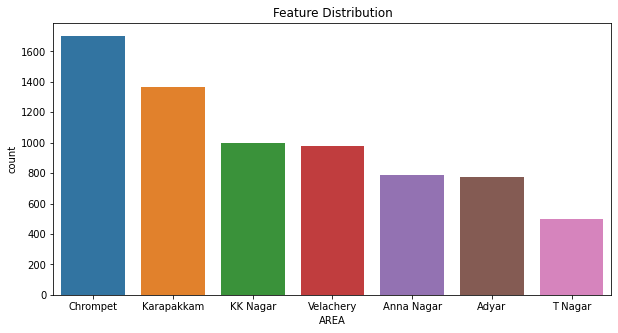

In [17]:
a_size= df_new['AREA'].size
l= [[i,j,round( ( (j / a_size) * 100), 2 )] for i,j in zip(df_new['AREA'].value_counts().index,df_new['AREA'].value_counts())]
for i in l:
  print("AREA: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="AREA", data=df_new, order= df_new['AREA'].value_counts().index)
#df_new['AREA'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a good distribution between the different categories of AREA, MOST HOUSES BEING IN CHROMPET, FOLLOWED BY KARAPAKKAM, KK NAGAR and so on,

AREA
Karapakkam     7043125.0
Adyar          8878350.0
Chrompet       9606725.0
Velachery     10494410.0
KK Nagar      12146740.0
Anna Nagar    13727895.0
T Nagar       14049650.0
Name: SALES_PRICE, dtype: float64


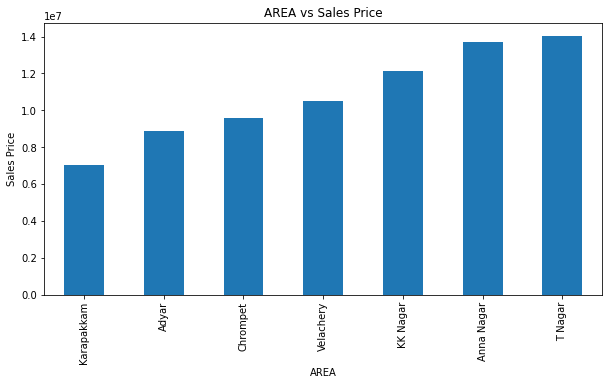

In [18]:
plt.figure( figsize=(10,5))
print(df_new.groupby('AREA')['SALES_PRICE'].median().sort_values())
df_new.groupby('AREA')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('AREA')
plt.ylabel('Sales Price')
plt.title('AREA vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w AREA and SALES_PRICE, i.e. Depending on the AREA, the Selling price of the house also changes.

2. We can see that From a buyers perspetive, we can buy a house at a lower rate at Karapakkam, and this rate increases in the order as shown in the Graph. From the House Construction Company point of view, they can construct and sell houses at a lower rate at Karapakkam, followed by Adyar & then Chrompet and so on.

3. We can Use LABEL ENCODING while encoding the AREA feature.

In [19]:
df_new['AREA']= df_new['AREA'].replace({'Karapakkam' : 1, 'Adyar' : 2, 'Chrompet' : 3, 'Velachery' : 4, 'KK Nagar' : 5, 'Anna Nagar' : 6, 'T Nagar' : 7})
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,1,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,6,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,2,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,4,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,1,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


####N_BEDROOM

In [20]:
df_new['N_BEDROOM']

0       1.0
1       2.0
2       1.0
3       3.0
4       1.0
       ... 
7104    1.0
7105    3.0
7106    2.0
7107    1.0
7108    3.0
Name: N_BEDROOM, Length: 7109, dtype: float64

In [21]:
df_new['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [22]:
df_new['N_BEDROOM'].isnull().sum()

1

1. N_BEDROOM is a CATEGORICAL FEATURE. But is of Float type. THIS NEED TO BE CONVERTED TO Integer type.
2. It actually has 4 categories.
3. It has 1 NULL VALUES. THIS CAN BE HANDLED BY REPLACING IT WITH MODE VALUE

In [23]:
df_new[df_new['N_BEDROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
4060,6,1556,16-01-2013,181,NaN,1.0,4,Partiall,No,23-01-1986,House,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,10797790


In [24]:
df.groupby('N_ROOM')['N_BEDROOM'].median()

N_ROOM
2    1.0
3    1.0
4    2.0
5    3.0
6    4.0
Name: N_BEDROOM, dtype: float64

In [25]:
df_new[(df_new['N_BATHROOM']==1.0) & (df_new['N_ROOM']==4)]['N_BEDROOM'].mode()

0    2.0
dtype: float64

We are see that the MODE for N_BEDROOM, For a HOUSE with 1- BATHROOM AND 4-ROOMS IS 2.0 . THEREFORE, replacing the NAN with 2.0

In [26]:
df_new['N_BEDROOM'].fillna(2.0, inplace=True)

In [27]:
#Converting N_BEDROOM TO Integer Datatype

df_new['N_BEDROOM'] = df_new['N_BEDROOM'].astype('int64')
df_new['N_BEDROOM'].unique()

array([1, 2, 3, 4])

NO_OF_BEDROOM:  1 	FEATURE DISTRIBUTION:  3795 	FEATURE DISTRIBUTION %:  53.38
NO_OF_BEDROOM:  2 	FEATURE DISTRIBUTION:  2353 	FEATURE DISTRIBUTION %:  33.1
NO_OF_BEDROOM:  3 	FEATURE DISTRIBUTION:  707 	FEATURE DISTRIBUTION %:  9.95
NO_OF_BEDROOM:  4 	FEATURE DISTRIBUTION:  254 	FEATURE DISTRIBUTION %:  3.57


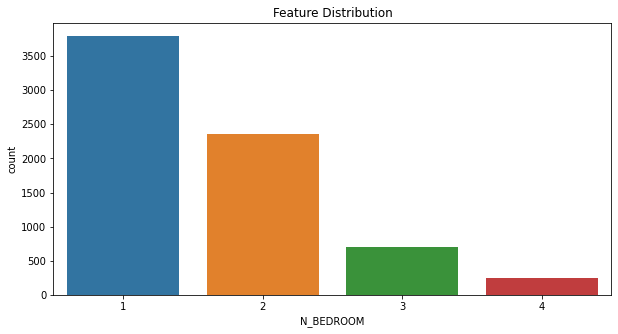

In [28]:
nbed_size= df_new['N_BEDROOM'].size
l= [[i,j,round( ( (j / nbed_size) * 100), 2 )] for i,j in zip(df_new['N_BEDROOM'].value_counts().index,df_new['N_BEDROOM'].value_counts())]
for i in l:
  print("NO_OF_BEDROOM: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="N_BEDROOM", data=df_new, order= df_new['N_BEDROOM'].value_counts().index)
#df_new['N_BEDROOM'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a that houses have mostly 1 or 2 BEDROOMS and less of 3 or 4 BEDROOMS.

N_BEDROOM
1     9168580.0
2    10994850.0
3    11663490.0
4    13172000.0
Name: SALES_PRICE, dtype: float64


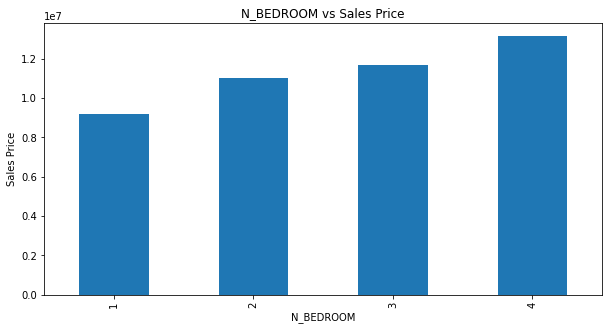

In [29]:
plt.figure( figsize=(10,5))
print(df_new.groupby('N_BEDROOM')['SALES_PRICE'].median().sort_values())
df_new.groupby('N_BEDROOM')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('N_BEDROOM')
plt.ylabel('Sales Price')
plt.title('N_BEDROOM vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w N_BEDROOM and SALES_PRICE, i.e. more the number of Bedrooms, higher is the Selling price of the HOUSE.


####N_BATHROOM

In [30]:
df_new['N_BATHROOM']

0       1.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
7104    1.0
7105    2.0
7106    1.0
7107    1.0
7108    2.0
Name: N_BATHROOM, Length: 7109, dtype: float64

In [31]:
df_new['N_BATHROOM'].unique()

array([ 1.,  2., nan])

In [32]:
df_new['N_BATHROOM'].isnull().sum()

5

1. N_BATHROOM is a CATEGORICAL FEATURE. But is of Float type. THIS NEED TO BE CONVERTED TO Integer type.
2. It actually has 2 categories.
3. It has 5 NULL VALUES. THIS CAN BE HANDLED BY REPLACING IT WITH MODE VALUE

In [33]:
df_new[df_new['N_BATHROOM'].isnull()]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
70,6,1589,22-03-2010,39,1,NaN,4,Partial,No,02-04-1966,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,12212350
5087,3,1016,02-08-2012,105,1,NaN,3,AbNormal,Yes,10-08-1980,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,10647920
6134,3,916,02-08-2012,173,1,NaN,3,Normal Sale,Yes,12-08-1974,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,8847420
6371,3,1035,06-11-2012,90,1,NaN,3,Partial,No,14-11-1981,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,8274200
6535,6,1864,05-03-2007,184,2,NaN,5,Family,Yes,07-03-1997,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,15556920


In [34]:
print('MODE for entire N_BATHROOM column:',df_new['N_BATHROOM'].mode())
print('MODE for N_BATHROOM having 4-N_ROOM and 1-N_BEDROOM:',df_new[(df_new['N_BEDROOM']==1) & (df_new['N_ROOM']==4)]['N_BATHROOM'].mode())
print('MODE for N_BATHROOM having 3-N_ROOM and 1-N_BEDROOM:',df_new[(df_new['N_BEDROOM']==1) & (df_new['N_ROOM']==3)]['N_BATHROOM'].mode())
print('MODE for N_BATHROOM having 5-N_ROOM and 2-N_BEDROOM:',df_new[(df_new['N_BEDROOM']==2) & (df_new['N_ROOM']==5)]['N_BATHROOM'].mode())

MODE for entire N_BATHROOM column: 0    1.0
dtype: float64
MODE for N_BATHROOM having 4-N_ROOM and 1-N_BEDROOM: 0    1.0
dtype: float64
MODE for N_BATHROOM having 3-N_ROOM and 1-N_BEDROOM: 0    1.0
dtype: float64
MODE for N_BATHROOM having 5-N_ROOM and 2-N_BEDROOM: 0    1.0
dtype: float64


In [35]:
df_new.groupby('N_ROOM')['N_BATHROOM'].median()

N_ROOM
2    1.0
3    1.0
4    1.0
5    2.0
6    2.0
Name: N_BATHROOM, dtype: float64

SINCE THE MODE IS SAME FOR ALL COMBINATIONS, HENCE WE SHALL REPLACE ALL THE NAN VALUES OF THE N_BATHROOM WITH 1.0 ITSELF

In [36]:
df_new['N_BATHROOM'].fillna(1.0, inplace=True)

In [37]:
#Converting N_BATHROOM TO Integer Datatype

df_new['N_BATHROOM'] = df_new['N_BATHROOM'].astype('int64')
df_new['N_BATHROOM'].unique()

array([1, 2])

NO_OF_BATHROOM:  1 	FEATURE DISTRIBUTION:  5594 	FEATURE DISTRIBUTION %:  78.69
NO_OF_BATHROOM:  2 	FEATURE DISTRIBUTION:  1515 	FEATURE DISTRIBUTION %:  21.31


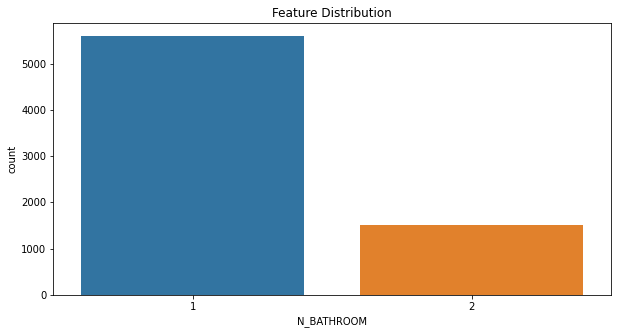

In [38]:
nbath_size= df_new['N_BATHROOM'].size
l= [[i,j,round( ( (j / nbath_size) * 100), 2 )] for i,j in zip(df_new['N_BATHROOM'].value_counts().index,df_new['N_BATHROOM'].value_counts())]
for i in l:
  print("NO_OF_BATHROOM: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="N_BATHROOM", data=df_new, order= df_new['N_BATHROOM'].value_counts().index)
#df_new['N_BATHROOM'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a that houses have mostly 1 BATHROOM as compared to having 2 BATHROOM.

N_BATHROOM
1     9990340.0
2    11307820.0
Name: SALES_PRICE, dtype: float64


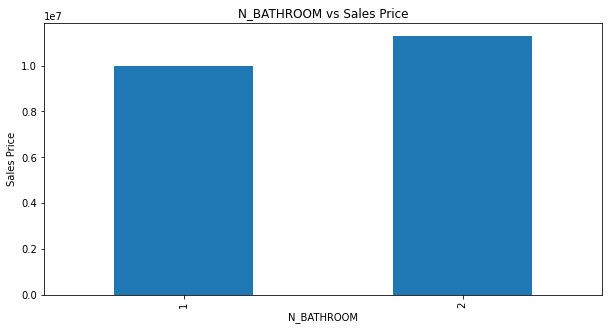

In [39]:
plt.figure( figsize=(10,5))
print(df_new.groupby('N_BATHROOM')['SALES_PRICE'].median().sort_values())
df_new.groupby('N_BATHROOM')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('N_BATHROOM')
plt.ylabel('Sales Price')
plt.title('N_BATHROOM vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w N_BATHROOM and SALES_PRICE, i.e. more the number of Bathroom, higher is the Selling price of the HOUSE.


####N_ROOM

In [40]:
df_new['N_ROOM']

0       3
1       5
2       3
3       5
4       3
       ..
7104    2
7105    5
7106    4
7107    2
7108    5
Name: N_ROOM, Length: 7109, dtype: int64

In [41]:
df_new['N_ROOM'].unique()

array([3, 5, 4, 2, 6])

In [42]:
df_new['N_ROOM'].isnull().sum()

0

1. N_ROOM is a CATEGORICAL FEATURE.
2. It actually has 5 categories.
3. It has 0 NULL VALUES. HENCE DEOSN'T NEED ANY CORRECTIONS

NO_OF_ROOM:  4 	FEATURE DISTRIBUTION:  2563 	FEATURE DISTRIBUTION %:  36.05
NO_OF_ROOM:  3 	FEATURE DISTRIBUTION:  2125 	FEATURE DISTRIBUTION %:  29.89
NO_OF_ROOM:  5 	FEATURE DISTRIBUTION:  1246 	FEATURE DISTRIBUTION %:  17.53
NO_OF_ROOM:  2 	FEATURE DISTRIBUTION:  921 	FEATURE DISTRIBUTION %:  12.96
NO_OF_ROOM:  6 	FEATURE DISTRIBUTION:  254 	FEATURE DISTRIBUTION %:  3.57


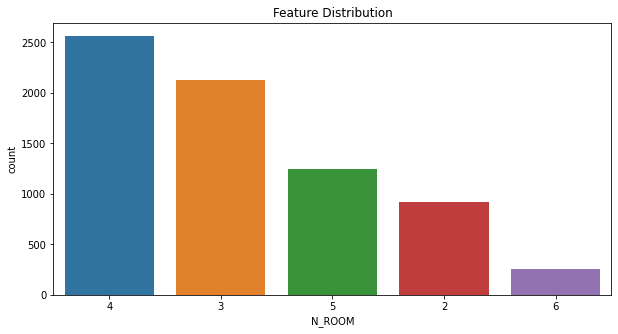

In [43]:
nrm_size= df_new['N_ROOM'].size
l= [[i,j,round( ( (j / nrm_size) * 100), 2 )] for i,j in zip(df_new['N_ROOM'].value_counts().index,df_new['N_ROOM'].value_counts())]
for i in l:
  print("NO_OF_ROOM: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="N_ROOM", data=df_new, order= df_new['N_ROOM'].value_counts().index)
#df_new['N_ROOM'].value_counts().plot(kind='bar')

1. From the above table and graph, we can see a that CHENNAI has more of 4 or 3 ROOMS houses as compared to 5 or 2 ROOMS houses.

N_ROOM
2     6900800.0
3     9051580.0
4    11207070.0
6    13172000.0
5    13488535.0
Name: SALES_PRICE, dtype: float64


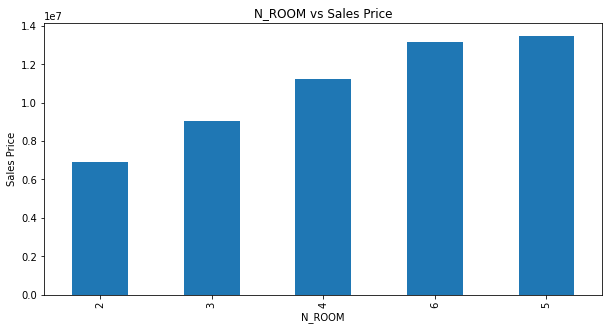

In [44]:
plt.figure( figsize=(10,5))
print(df_new.groupby('N_ROOM')['SALES_PRICE'].median().sort_values())
df_new.groupby('N_ROOM')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('N_ROOM')
plt.ylabel('Sales Price')
plt.title('N_ROOM vs Sales Price')
plt.show()

1. From this Graph we can see that more the number of ROOMS, higher is the Selling price of the HOUSE.
2. However, we can see that the price differences between a 2-ROOM HOUSE and a 3-ROOM HOUSE, a 3-ROOM HOUSE and a 4-ROOM HOUSE and a 4-ROOM HOUSE and a 5-ROOM HOUSE is HUGE.
3. However, the price difference between a 5-ROOM HOUSE and a 6-ROOM HOUSE is not much


####SALE_COND
	

In [45]:
df_new['SALE_COND']

0          AbNormal
1          AbNormal
2          AbNormal
3            Family
4          AbNormal
           ...     
7104        AdjLand
7105         Family
7106    Normal Sale
7107        Partial
7108        Partial
Name: SALE_COND, Length: 7109, dtype: object

In [46]:
df_new['SALE_COND'].isnull().sum()

0

In [47]:
df_new['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [48]:
df_new['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

1. SALE_COND is a CATEGORICAL FEATURE
2. It does not have ANY NULL VALUES.
3. We can see that there are actually 5 categories in SALE_COND. BUT as THERE IS SPELLING MISTAKES in some records, THEY ARE BEING CONSIDERED AS DIFFERENT SALE_COND. HENCE WE NEED TO CORRECT THIS.

In [49]:
# Deal with trailing spaces
df_new['SALE_COND'] = df_new['SALE_COND'].str.strip()
df_new['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [50]:
mappings = {'Adj Land': 'AdjLand',
            'Partiall': 'Partial',
            'PartiaLl': 'Partial', 
            'Ab Normal': 'AbNormal'}

# Replace values and collapse data
df_new['SALE_COND'] = df_new['SALE_COND'].replace(mappings)


SALE_CONDITION:  AdjLand 	FEATURE DISTRIBUTION:  1439 	FEATURE DISTRIBUTION %:  20.24
SALE_CONDITION:  Partial 	FEATURE DISTRIBUTION:  1433 	FEATURE DISTRIBUTION %:  20.16
SALE_CONDITION:  Normal Sale 	FEATURE DISTRIBUTION:  1423 	FEATURE DISTRIBUTION %:  20.02
SALE_CONDITION:  AbNormal 	FEATURE DISTRIBUTION:  1411 	FEATURE DISTRIBUTION %:  19.85
SALE_CONDITION:  Family 	FEATURE DISTRIBUTION:  1403 	FEATURE DISTRIBUTION %:  19.74


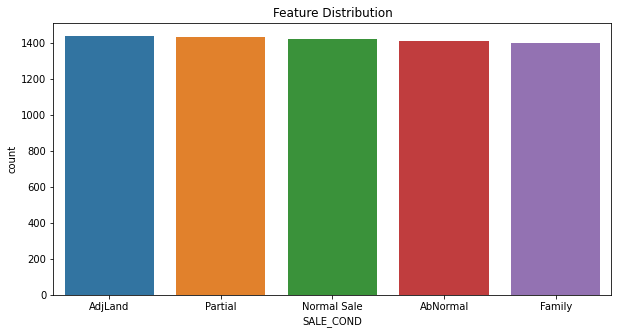

In [51]:
slcnd_size= df_new['SALE_COND'].size
l= [[i,j,round( ( (j / slcnd_size) * 100), 2 )] for i,j in zip(df_new['SALE_COND'].value_counts().index,df_new['SALE_COND'].value_counts())]
for i in l:
  print("SALE_CONDITION: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="SALE_COND", data=df_new, order= df_new['SALE_COND'].value_counts().index)
#df_new['SALE_COND'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a good distribution between the different categories of SALE_COND.

SALE_COND
Partial        10134780.0
Normal Sale    10276200.0
AbNormal       10299920.0
Family         10313310.0
AdjLand        10568895.0
Name: SALES_PRICE, dtype: float64


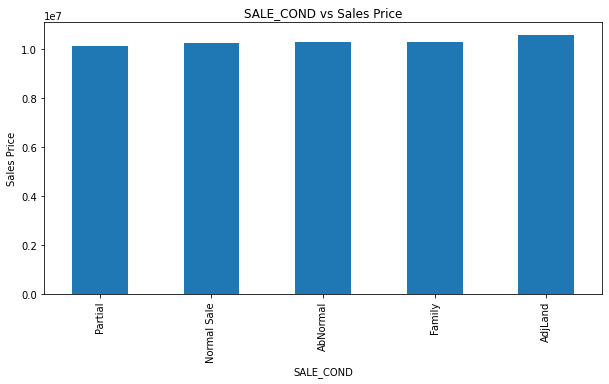

In [52]:
plt.figure( figsize=(10,5))
print(df_new.groupby('SALE_COND')['SALES_PRICE'].median().sort_values())
df_new.groupby('SALE_COND')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('SALE_COND')
plt.ylabel('Sales Price')
plt.title('SALE_COND vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w SALE_COND and SALES_PRICE, i.e. Depending on the SALE_COND, the Selling price of the house also changes.

2. We can Use LABEL ENCODING while encoding the SALE_COND feature.

In [53]:
df_new['SALE_COND']= df_new['SALE_COND'].replace({'Partial' : 1, 'Normal Sale' : 2, 'AbNormal' : 3, 'Family' : 4, 'AdjLand' : 5})
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,1,1004,04-05-2011,131,1,1,3,3,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,6,1986,19-12-2006,26,2,1,5,3,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,2,909,04-02-2012,70,1,1,3,3,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,4,1855,13-03-2010,14,3,2,5,4,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,1,1226,05-10-2009,84,1,1,3,3,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


####PARK_FACIL

In [54]:
df_new['PARK_FACIL']

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
7104     No
7105    Yes
7106     No
7107    Yes
7108    Yes
Name: PARK_FACIL, Length: 7109, dtype: object

In [55]:
df_new['PARK_FACIL'].isnull().sum()

0

In [56]:
df_new['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [57]:
df_new['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

1. PARK_FACIL is a CATEGORICAL FEATURE
2. It does not have ANY NULL VALUES.
3. We can see that there are actually 2 categories in PARK_FACIL. BUT as THERE IS SPELLING MISTAKES in some records, THEY ARE BEING CONSIDERED AS DIFFERENT PARK_FACIL. HENCE WE NEED TO CORRECT THIS.

In [58]:
# Replace values and collapse data
df_new['PARK_FACIL'] = df_new['PARK_FACIL'].replace({'Noo': 'No'})

PARKING FACILITY AVAILABE:  Yes 	FEATURE DISTRIBUTION:  3587 	FEATURE DISTRIBUTION %:  50.46
PARKING FACILITY AVAILABE:  No 	FEATURE DISTRIBUTION:  3522 	FEATURE DISTRIBUTION %:  49.54


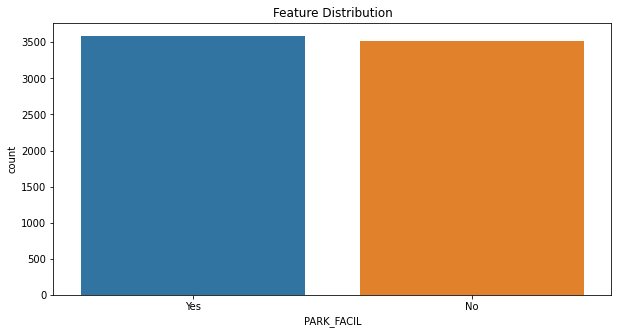

In [59]:
prk_size= df_new['PARK_FACIL'].size
l= [[i,j,round( ( (j / prk_size) * 100), 2 )] for i,j in zip(df_new['PARK_FACIL'].value_counts().index,df_new['PARK_FACIL'].value_counts())]
for i in l:
  print("PARKING FACILITY AVAILABE: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="PARK_FACIL", data=df_new, order= df_new['PARK_FACIL'].value_counts().index)
#df_new['PARK_FACIL'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a good distribution between the different categories of PARK_FACIL.

PARK_FACIL
No      9815165.0
Yes    10768375.0
Name: SALES_PRICE, dtype: float64


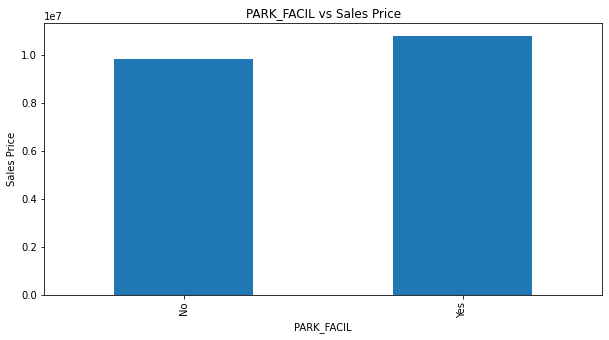

In [60]:
plt.figure( figsize=(10,5))
print(df_new.groupby('PARK_FACIL')['SALES_PRICE'].median().sort_values())
df_new.groupby('PARK_FACIL')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('PARK_FACIL')
plt.ylabel('Sales Price')
plt.title('PARK_FACIL vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w PARK_FACIL and SALES_PRICE, i.e. Depending on the PARK_FACIL, the Selling price of the house also changes.

2. We can Use LABEL ENCODING while encoding the PARK_FACIL feature.

In [61]:
df_new['PARK_FACIL']= df_new['PARK_FACIL'].replace({'No' : 1, 'Yes' : 2})
#df_new['N_BATHROOM'] = df_new['N_BATHROOM'].astype('int64')
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,1,1004,04-05-2011,131,1,1,3,3,2,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,6,1986,19-12-2006,26,2,1,5,3,1,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,2,909,04-02-2012,70,1,1,3,3,2,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,4,1855,13-03-2010,14,3,2,5,4,1,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,1,1226,05-10-2009,84,1,1,3,3,2,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


####BUILDTYPE

In [62]:
df_new['BUILDTYPE']

0       Commercial
1       Commercial
2       Commercial
3           Others
4           Others
           ...    
7104        Others
7105        Others
7106         House
7107    Commercial
7108        Others
Name: BUILDTYPE, Length: 7109, dtype: object

In [63]:
df_new['BUILDTYPE'].isnull().sum()

0

In [64]:
df_new['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [65]:
df_new['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

1. BUILDTYPE is a CATEGORICAL FEATURE
2. It does not have ANY NULL VALUES.
3. We can see that there are actually 3 categories in BUILDTYPE. BUT as THERE IS SPELLING MISTAKES in some records, THEY ARE BEING CONSIDERED AS DIFFERENT BUILDTYPE. HENCE WE NEED TO CORRECT THIS.

In [66]:
# Deal with trailing spaces
df_new['BUILDTYPE'] = df_new['BUILDTYPE'].str.strip()
df_new['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [67]:
# Replace values and collapse data
df_new['BUILDTYPE'] = df_new['BUILDTYPE'].replace({'Other': 'Others', 
                                                   'Comercial': 'Commercial'})

TYPE_OF_BUILDING:  House 	FEATURE DISTRIBUTION:  2444 	FEATURE DISTRIBUTION %:  34.38
TYPE_OF_BUILDING:  Others 	FEATURE DISTRIBUTION:  2336 	FEATURE DISTRIBUTION %:  32.86
TYPE_OF_BUILDING:  Commercial 	FEATURE DISTRIBUTION:  2329 	FEATURE DISTRIBUTION %:  32.76


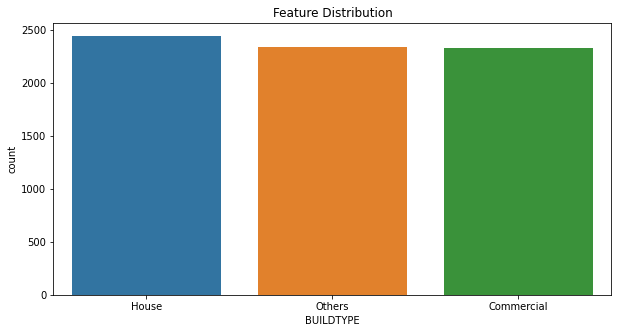

In [68]:
build_size= df_new['BUILDTYPE'].size
l= [[i,j,round( ( (j / build_size) * 100), 2 )] for i,j in zip(df_new['BUILDTYPE'].value_counts().index,df_new['BUILDTYPE'].value_counts())]
for i in l:
  print("TYPE_OF_BUILDING: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="BUILDTYPE", data=df_new, order= df_new['BUILDTYPE'].value_counts().index)
#df_new['BUILDTYPE'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a good distribution between the different categories of BUILDTYPE.

BUILDTYPE
House          8985370.0
Others         9637260.0
Commercial    13356200.0
Name: SALES_PRICE, dtype: float64


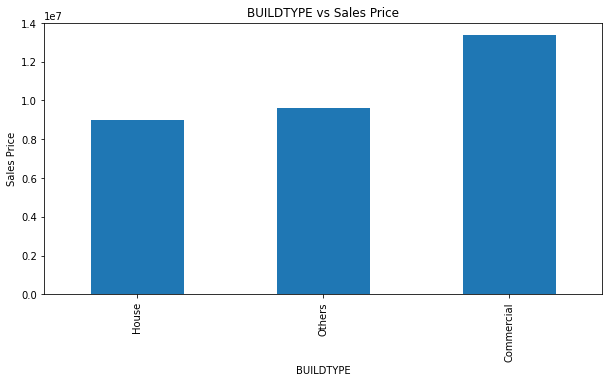

In [69]:
plt.figure( figsize=(10,5))
print(df_new.groupby('BUILDTYPE')['SALES_PRICE'].median().sort_values())
df_new.groupby('BUILDTYPE')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('BUILDTYPE')
plt.ylabel('Sales Price')
plt.title('BUILDTYPE vs Sales Price')
plt.show()

1. From this Graph we can see that there is Relationship b/w BUILDTYPE and SALES_PRICE, i.e. THE SELLING PRICE INCREASES as we move from House to Others and Others to Commercial. 
2. However the INCREASE IS NOT LINEAR

2. We will Use OHE-HOT ENCODING while encoding the BUILDTYPE feature.

In [70]:
df_new= pd.get_dummies(df_new, columns = ['BUILDTYPE'])
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,131,1,1,3,3,2,15-05-1967,...,Paved,A,4.0,3.9,4.9,4.330,7600000,1,0,0
1,6,1986,19-12-2006,26,2,1,5,3,1,22-12-1995,...,Gravel,RH,4.9,4.2,2.5,3.765,21717770,1,0,0
2,2,909,04-02-2012,70,1,1,3,3,2,09-02-1992,...,Gravel,RL,4.1,3.8,2.2,3.090,13159200,1,0,0
3,4,1855,13-03-2010,14,3,2,5,4,1,18-03-1988,...,Paved,I,4.7,3.9,3.6,4.010,9630290,0,0,1
4,1,1226,05-10-2009,84,1,1,3,3,2,13-10-1979,...,Gravel,C,3.0,2.5,4.1,3.290,7406250,0,0,1


####UTILITY_AVAIL

In [71]:
df_new['UTILITY_AVAIL']

0        AllPub
1        AllPub
2           ELO
3       NoSewr 
4        AllPub
         ...   
7104        ELO
7105     NoSeWa
7106     NoSeWa
7107        ELO
7108        ELO
Name: UTILITY_AVAIL, Length: 7109, dtype: object

In [72]:
df_new['UTILITY_AVAIL'].isnull().sum()

0

In [73]:
df_new['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [74]:
df_new['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

1. UTILITY_AVAIL is a CATEGORICAL FEATURE
2. It does not have ANY NULL VALUES.
3. We can see that there are actually 4 categories in UTILITY_AVAIL. BUT as THERE IS SPELLING MISTAKES in some records, THEY ARE BEING CONSIDERED AS DIFFERENT UTILITY_AVAIL. HENCE WE NEED TO CORRECT THIS.

In [75]:
# Deal with trailing spaces
df_new['UTILITY_AVAIL'] = df_new['UTILITY_AVAIL'].str.strip()
df_new['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa', 'All Pub'], dtype=object)

In [76]:
# Replace values and collapse data
df_new['UTILITY_AVAIL'] = df_new['UTILITY_AVAIL'].replace({'All Pub': 'AllPub'})


TYPE_OF_UTILITIES_AVAILABLE:  AllPub 	FEATURE DISTRIBUTION:  1887 	FEATURE DISTRIBUTION %:  26.54
TYPE_OF_UTILITIES_AVAILABLE:  NoSeWa 	FEATURE DISTRIBUTION:  1871 	FEATURE DISTRIBUTION %:  26.32
TYPE_OF_UTILITIES_AVAILABLE:  NoSewr 	FEATURE DISTRIBUTION:  1829 	FEATURE DISTRIBUTION %:  25.73
TYPE_OF_UTILITIES_AVAILABLE:  ELO 	FEATURE DISTRIBUTION:  1522 	FEATURE DISTRIBUTION %:  21.41


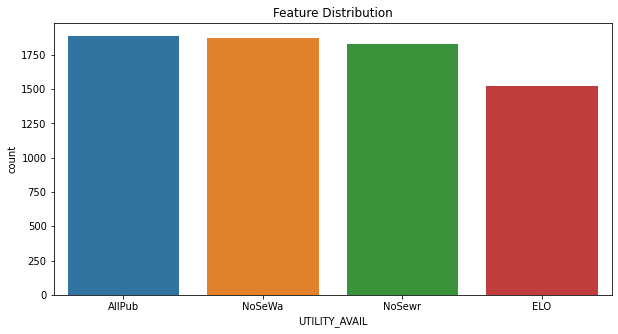

In [77]:
util_size= df_new['UTILITY_AVAIL'].size
l= [[i,j,round( ( (j / util_size) * 100), 2 )] for i,j in zip(df_new['UTILITY_AVAIL'].value_counts().index,df_new['UTILITY_AVAIL'].value_counts())]
for i in l:
  print("TYPE_OF_UTILITIES_AVAILABLE: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="UTILITY_AVAIL", data=df_new, order= df_new['UTILITY_AVAIL'].value_counts().index)
#df_new['UTILITY_AVAIL'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a good distribution between the different categories of UTILITY_AVAIL.

UTILITY_AVAIL
ELO        9650125.0
NoSeWa    10411700.0
NoSewr    10441640.0
AllPub    10696080.0
Name: SALES_PRICE, dtype: float64


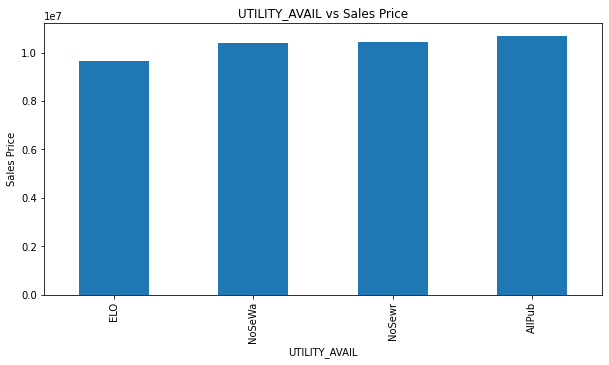

In [78]:
plt.figure( figsize=(10,5))
print(df_new.groupby('UTILITY_AVAIL')['SALES_PRICE'].median().sort_values())
df_new.groupby('UTILITY_AVAIL')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('Sales Price')
plt.title('UTILITY_AVAIL vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w UTILITY_AVAIL and SALES_PRICE, i.e. Depending on the UTILITIES available for the house, the Selling price of the house also changes.

2. We can Use LABEL ENCODING while encoding the UTILITY_AVAIL feature.

In [79]:
df_new['UTILITY_AVAIL']= df_new['UTILITY_AVAIL'].map({'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4})
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,131,1,1,3,3,2,15-05-1967,...,Paved,A,4.0,3.9,4.9,4.330,7600000,1,0,0
1,6,1986,19-12-2006,26,2,1,5,3,1,22-12-1995,...,Gravel,RH,4.9,4.2,2.5,3.765,21717770,1,0,0
2,2,909,04-02-2012,70,1,1,3,3,2,09-02-1992,...,Gravel,RL,4.1,3.8,2.2,3.090,13159200,1,0,0
3,4,1855,13-03-2010,14,3,2,5,4,1,18-03-1988,...,Paved,I,4.7,3.9,3.6,4.010,9630290,0,0,1
4,1,1226,05-10-2009,84,1,1,3,3,2,13-10-1979,...,Gravel,C,3.0,2.5,4.1,3.290,7406250,0,0,1


####STREET

In [80]:
df_new['STREET']

0           Paved
1          Gravel
2          Gravel
3           Paved
4          Gravel
          ...    
7104    No Access
7105    No Access
7106       Gravel
7107        Paved
7108        Paved
Name: STREET, Length: 7109, dtype: object

In [81]:
df_new['STREET'].isnull().sum()

0

In [82]:
df_new['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [83]:
df_new['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

1. STREET is a CATEGORICAL FEATURE
2. It does not have ANY NULL VALUES.
3. We can see that there are actually 3 categories in STREET. BUT as THERE IS SPELLING MISTAKES in some records, THEY ARE BEING CONSIDERED AS DIFFERENT STREET. HENCE WE NEED TO CORRECT THIS.

In [84]:
# Deal with trailing spaces
df_new['STREET'] = df_new['STREET'].str.strip()
df_new['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [85]:
# Replace values and collapse data
df_new['STREET'] = df_new['STREET'].replace({'Pavd': 'Paved',
                                             'NoAccess': 'No Access'})

TYPE_OF_STREET:  Paved 	FEATURE DISTRIBUTION:  2572 	FEATURE DISTRIBUTION %:  36.18
TYPE_OF_STREET:  Gravel 	FEATURE DISTRIBUTION:  2520 	FEATURE DISTRIBUTION %:  35.45
TYPE_OF_STREET:  No Access 	FEATURE DISTRIBUTION:  2017 	FEATURE DISTRIBUTION %:  28.37


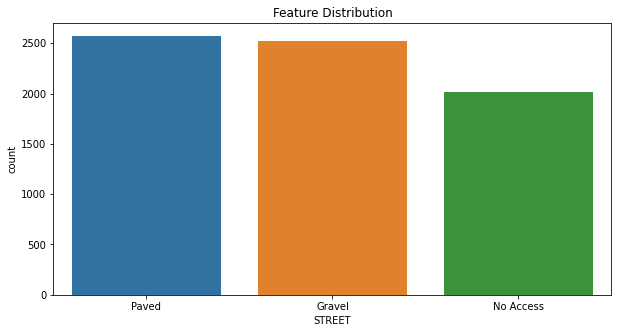

In [86]:
st_size= df_new['STREET'].size
l= [[i,j,round( ( (j / st_size) * 100), 2 )] for i,j in zip(df_new['STREET'].value_counts().index,df_new['STREET'].value_counts())]
for i in l:
  print("TYPE_OF_STREET: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="STREET", data=df_new, order= df_new['STREET'].value_counts().index)
#df_new['STREET'].value_counts().plot(kind='bar')

1. All corrections have been made.
2. From the above table and graph, we can see a good distribution between the different categories of STREET. But people prefer have a proper Paved Street around their houses as compared to a Gravel Street.

STREET
No Access     9406050.0
Paved        10470070.0
Gravel       10847225.0
Name: SALES_PRICE, dtype: float64


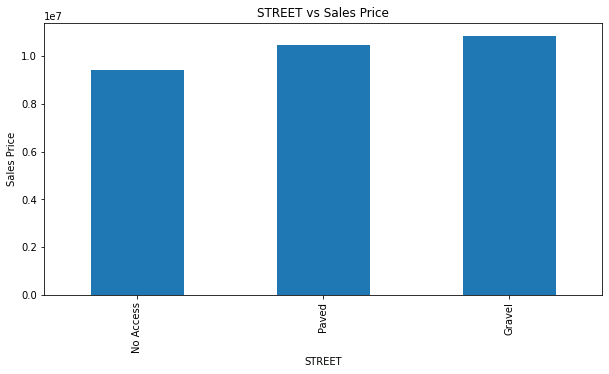

In [87]:
plt.figure( figsize=(10,5))
print(df_new.groupby('STREET')['SALES_PRICE'].median().sort_values())
df_new.groupby('STREET')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('STREET')
plt.ylabel('Sales Price')
plt.title('STREET vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w STREET and SALES_PRICE, i.e. if there is no STREET access, then the Selling Price is lower as compared to having a Paved or a Gravel-laid STREET respectively.

2. We can Use LABEL ENCODING while encoding the STREET feature.

In [88]:
df_new['STREET']= df_new['STREET'].map({'No Access' : 1, 'Paved' : 2, 'Gravel' : 3})
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,131,1,1,3,3,2,15-05-1967,...,2,A,4.0,3.9,4.9,4.330,7600000,1,0,0
1,6,1986,19-12-2006,26,2,1,5,3,1,22-12-1995,...,3,RH,4.9,4.2,2.5,3.765,21717770,1,0,0
2,2,909,04-02-2012,70,1,1,3,3,2,09-02-1992,...,3,RL,4.1,3.8,2.2,3.090,13159200,1,0,0
3,4,1855,13-03-2010,14,3,2,5,4,1,18-03-1988,...,2,I,4.7,3.9,3.6,4.010,9630290,0,0,1
4,1,1226,05-10-2009,84,1,1,3,3,2,13-10-1979,...,3,C,3.0,2.5,4.1,3.290,7406250,0,0,1


####MZZONE

In [89]:
df_new['MZZONE']

0        A
1       RH
2       RL
3        I
4        C
        ..
7104    RM
7105    RH
7106     I
7107    RL
7108     I
Name: MZZONE, Length: 7109, dtype: object

In [90]:
df_new['MZZONE'].isnull().sum()

0

In [91]:
df_new['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [92]:
df_new['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

1. MZZONE is a CATEGORICAL FEATURE
2. It does not have ANY NULL VALUES.
3. We can see that there are 6 categories in MZZONE. NO CORRECTIONS NEEDED.

MZ_ZONES:  RL 	FEATURE DISTRIBUTION:  1858 	FEATURE DISTRIBUTION %:  26.14
MZ_ZONES:  RH 	FEATURE DISTRIBUTION:  1822 	FEATURE DISTRIBUTION %:  25.63
MZ_ZONES:  RM 	FEATURE DISTRIBUTION:  1817 	FEATURE DISTRIBUTION %:  25.56
MZ_ZONES:  C 	FEATURE DISTRIBUTION:  550 	FEATURE DISTRIBUTION %:  7.74
MZ_ZONES:  A 	FEATURE DISTRIBUTION:  537 	FEATURE DISTRIBUTION %:  7.55
MZ_ZONES:  I 	FEATURE DISTRIBUTION:  525 	FEATURE DISTRIBUTION %:  7.39


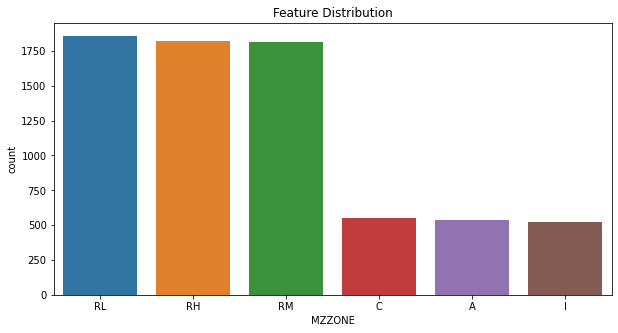

In [93]:
mzz_size= df_new['MZZONE'].size
l= [[i,j,round( ( (j / mzz_size) * 100), 2 )] for i,j in zip(df_new['MZZONE'].value_counts().index,df_new['MZZONE'].value_counts())]
for i in l:
  print("MZ_ZONES: ",i[0],"\tFEATURE DISTRIBUTION: ",i[1],"\tFEATURE DISTRIBUTION %: ",i[2])


plt.figure( figsize=(10,5))
plt.title("Feature Distribution")
sns.countplot(x="MZZONE", data=df_new, order= df_new['MZZONE'].value_counts().index)
#df_new['MZZONE'].value_counts().plot(kind='bar')

1. From the above table and graph, we can see a good distribution between the different categories of MZZONE.

MZZONE
A      6928000.0
C      7721190.0
I      8312670.0
RH    10505240.0
RL    11184020.0
RM    11839510.0
Name: SALES_PRICE, dtype: float64


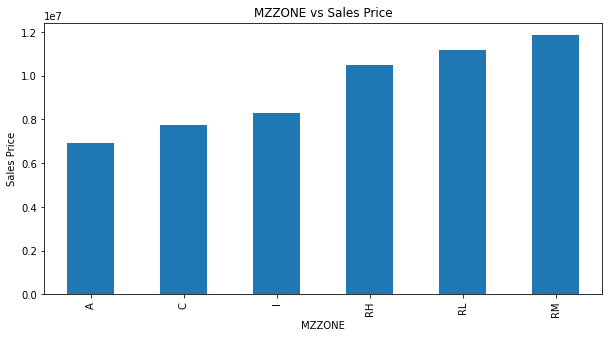

In [94]:
plt.figure( figsize=(10,5))
print(df_new.groupby('MZZONE')['SALES_PRICE'].median().sort_values())
df_new.groupby('MZZONE')['SALES_PRICE'].median().sort_values().plot.bar()
plt.xlabel('MZZONE')
plt.ylabel('Sales Price')
plt.title('MZZONE vs Sales Price')
plt.show()

1. From this Graph we can see that there is positive Linear Relation b/w MZZONE and SALES_PRICE, i.e. Depending on the MZZONE, the Selling price of the house also changes.

2. We can Use LABEL ENCODING while encoding the MZZONE feature.

In [95]:
df_new['MZZONE']= df_new['MZZONE'].map({'A' : 1, 'C' : 2, 'I' : 3, 'RH' : 4, 'RL' : 5, 'RM' : 6})
df_new.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,131,1,1,3,3,2,15-05-1967,...,2,1,4.0,3.9,4.9,4.330,7600000,1,0,0
1,6,1986,19-12-2006,26,2,1,5,3,1,22-12-1995,...,3,4,4.9,4.2,2.5,3.765,21717770,1,0,0
2,2,909,04-02-2012,70,1,1,3,3,2,09-02-1992,...,3,5,4.1,3.8,2.2,3.090,13159200,1,0,0
3,4,1855,13-03-2010,14,3,2,5,4,1,18-03-1988,...,2,3,4.7,3.9,3.6,4.010,9630290,0,0,1
4,1,1226,05-10-2009,84,1,1,3,3,2,13-10-1979,...,3,2,3.0,2.5,4.1,3.290,7406250,0,0,1


###CHECKING ALL CONTINUOUS FEATURES


####INT_SQFT

In [96]:
df_new['INT_SQFT']

0       1004
1       1986
2        909
3       1855
4       1226
        ... 
7104     598
7105    1897
7106    1614
7107     787
7108    1896
Name: INT_SQFT, Length: 7109, dtype: int64

In [97]:
df_new['INT_SQFT'].isnull().sum()

0

1. INT_SQFT is a CONTINUOUS FEATURE
2. It does not have ANY NULL VALUES.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


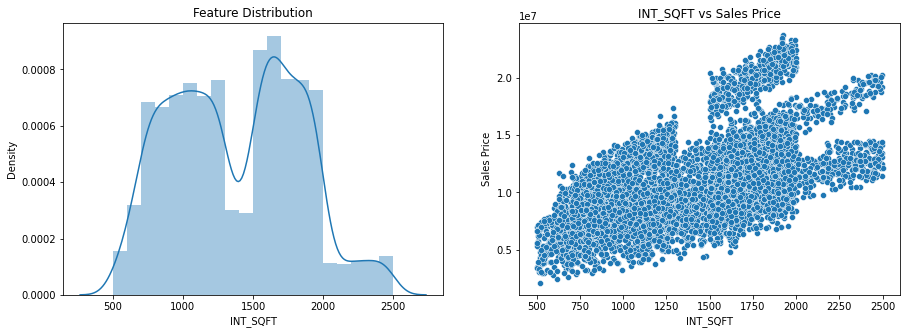

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


In [98]:
plt.figure( figsize=(15,5))
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.title('Feature Distribution')
sns.distplot(df_new['INT_SQFT'], bins=20)

plt.subplot(1, 2, 2)
sns.scatterplot( x= df_new['INT_SQFT'], y=df_new['SALES_PRICE'])
#df_new.plot(x= 'INT_SQFT', y='SALES_PRICE', style='o')
#.median().sort_values(by=['SALES_PRICE']).plot.bar()
plt.xlabel('INT_SQFT')
plt.ylabel('Sales Price')
plt.title('INT_SQFT vs Sales Price')
plt.show()

df_new[['INT_SQFT', 'SALES_PRICE']].corr()

1. From the 1st graph, we can see that INT_SQFT does not follow an exact a Normal distribution. But no Skew is seen as well.

2. From the 2nd Graph we can see that there is Relation b/w INT_SQFT and SALES_PRICE, i.e. as the Size of the house increases, the Selling price of the house also increases.

3. There is also a +ve Correlation between INT_SQFT and SALES_PRICE, that means there is a positive Linear Relation between INT_SQFT and SALES_PRICE

####DIST_MAINROAD

In [99]:
df_new['DIST_MAINROAD']

0       131
1        26
2        70
3        14
4        84
       ... 
7104     51
7105     52
7106    152
7107     40
7108    156
Name: DIST_MAINROAD, Length: 7109, dtype: int64

In [100]:
df_new['DIST_MAINROAD'].isnull().sum()

0

1. DIST_MAINROAD is a CONTINUOUS FEATURE
2. It does not have ANY NULL VALUES.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


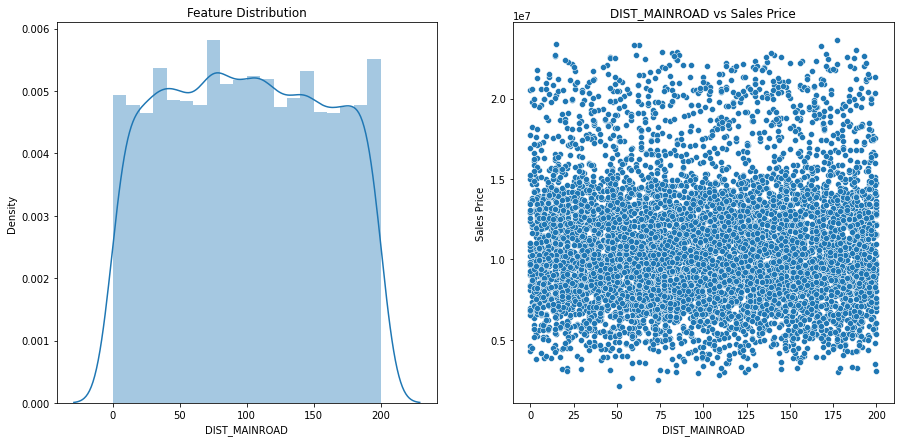

,DIST_MAINROAD,SALES_PRICE
DIST_MAINROAD,1.000000,0.018783
SALES_PRICE,0.018783,1.000000


In [101]:
plt.figure( figsize=(15,7))
plt.subplot(1, 2, 1) # (rows, columns, panel number)
plt.title('Feature Distribution')
sns.distplot(df_new['DIST_MAINROAD'], bins=20)

plt.subplot(1, 2, 2)
sns.scatterplot( x= df_new['DIST_MAINROAD'], y=df_new['SALES_PRICE'])
#df_new.plot(x= 'DIST_MAINROAD', y='SALES_PRICE', style='o')
#.median().sort_values(by=['SALES_PRICE']).plot.bar()
plt.xlabel('DIST_MAINROAD')
plt.ylabel('Sales Price')
plt.title('DIST_MAINROAD vs Sales Price')
plt.show()

df_new[['DIST_MAINROAD', 'SALES_PRICE']].corr()

1. From the 1st graph, we can see a Uniform distribution of DIST_MAINROAD.

2. From the 2nd Graph we can see that there is NO Relation b/w DIST_MAINROAD and SALES_PRICE, i.e. IRRESPECTIVE OF THE DISTANCE OF THE HOUSE FROM THE MAIN ROAD, the Selling price of the house also DOES NOT CHANGE.

3. There is also a NO Correlation between DIST_MAINROAD and SALES_PRICE, that means there is a NO Linear Relation between DIST_MAINROAD and SALES_PRICE.

4. WE can even DROP DIST_MAINROAD FEATURE for the ML MODEL

In [102]:
df_new = df_new.drop(['DIST_MAINROAD'], axis= 1)
df_new

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,1,1,3,3,2,15-05-1967,4,2,1,4.0,3.9,4.9,4.330,7600000,1,0,0
1,6,1986,19-12-2006,2,1,5,3,1,22-12-1995,4,3,4,4.9,4.2,2.5,3.765,21717770,1,0,0
2,2,909,04-02-2012,1,1,3,3,2,09-02-1992,1,3,5,4.1,3.8,2.2,3.090,13159200,1,0,0
3,4,1855,13-03-2010,3,2,5,4,1,18-03-1988,3,2,3,4.7,3.9,3.6,4.010,9630290,0,0,1
4,1,1226,05-10-2009,1,1,3,3,2,13-10-1979,4,3,2,3.0,2.5,4.1,3.290,7406250,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,03-01-2011,1,1,2,5,1,15-01-1962,1,1,6,3.0,2.2,2.4,2.520,5353000,0,0,1
7105,4,1897,08-04-2004,3,2,5,4,2,11-04-1995,2,1,4,3.6,4.5,3.3,3.920,10818480,0,0,1
7106,4,1614,25-08-2006,2,1,4,2,1,01-09-1978,2,3,3,4.3,4.2,2.9,3.840,8351410,0,1,0
7107,1,787,03-08-2009,1,1,2,1,2,11-08-1977,1,2,5,4.6,3.8,4.1,4.160,8507000,1,0,0


####QS_ROOMS

In [103]:
df_new['QS_ROOMS']

0       4.0
1       4.9
2       4.1
3       4.7
4       3.0
       ... 
7104    3.0
7105    3.6
7106    4.3
7107    4.6
7108    3.1
Name: QS_ROOMS, Length: 7109, dtype: float64

In [104]:
df_new['QS_ROOMS'].isnull().sum()

0

1. QS_ROOMS is a CONTINUOUS FEATURE
2. It does not have ANY NULL VALUES.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


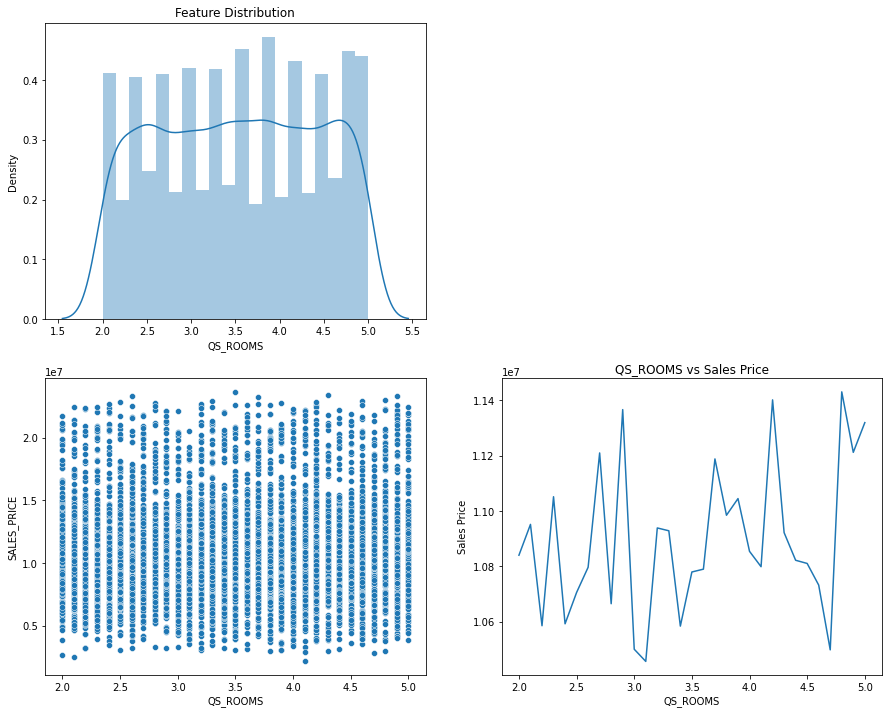

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


In [105]:
plt.figure( figsize=(15,12))
plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.title('Feature Distribution')
sns.distplot(df_new['QS_ROOMS'], bins=20)

plt.subplot(2, 2, 3)
sns.scatterplot( x= df_new['QS_ROOMS'], y=df_new['SALES_PRICE'])
plt.subplot(2, 2, 4)
df_new.groupby('QS_ROOMS')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_ROOMS')
plt.ylabel('Sales Price')
plt.title('QS_ROOMS vs Sales Price')
plt.show()

df_new[['QS_ROOMS', 'SALES_PRICE']].corr()

1. From the 1st graph, we can see a Uniform distribution of QS_ROOMS.

2. From the 2nd Graph we can see that there is NO Relation b/w QS_ROOMS and SALES_PRICE, i.e. IRRESPECTIVE OF THE INCREASE SIZE OF THE ROOMS, the Selling price of the house KEEPS FLUCTUATUNG DOES NOT INCREASE OR DECREASE CONSISTENTLY.

3. There is also a NO Correlation between QS_ROOMS and SALES_PRICE, that means there is a NO Linear Relation between QS_ROOMS and SALES_PRICE.

4. WE can even DROP QS_ROOMS FEATURE for the ML MODEL

In [106]:
df_new = df_new.drop(['QS_ROOMS'], axis= 1)
df_new

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,1,1,3,3,2,15-05-1967,4,2,1,3.9,4.9,4.330,7600000,1,0,0
1,6,1986,19-12-2006,2,1,5,3,1,22-12-1995,4,3,4,4.2,2.5,3.765,21717770,1,0,0
2,2,909,04-02-2012,1,1,3,3,2,09-02-1992,1,3,5,3.8,2.2,3.090,13159200,1,0,0
3,4,1855,13-03-2010,3,2,5,4,1,18-03-1988,3,2,3,3.9,3.6,4.010,9630290,0,0,1
4,1,1226,05-10-2009,1,1,3,3,2,13-10-1979,4,3,2,2.5,4.1,3.290,7406250,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,03-01-2011,1,1,2,5,1,15-01-1962,1,1,6,2.2,2.4,2.520,5353000,0,0,1
7105,4,1897,08-04-2004,3,2,5,4,2,11-04-1995,2,1,4,4.5,3.3,3.920,10818480,0,0,1
7106,4,1614,25-08-2006,2,1,4,2,1,01-09-1978,2,3,3,4.2,2.9,3.840,8351410,0,1,0
7107,1,787,03-08-2009,1,1,2,1,2,11-08-1977,1,2,5,3.8,4.1,4.160,8507000,1,0,0


####QS_BATHROOM

In [107]:
df_new['QS_BATHROOM']

0       3.9
1       4.2
2       3.8
3       3.9
4       2.5
       ... 
7104    2.2
7105    4.5
7106    4.2
7107    3.8
7108    3.5
Name: QS_BATHROOM, Length: 7109, dtype: float64

In [108]:
df_new['QS_BATHROOM'].isnull().sum()

0

1. QS_BATHROOM is a CONTINUOUS FEATURE
2. It does not have ANY NULL VALUES.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


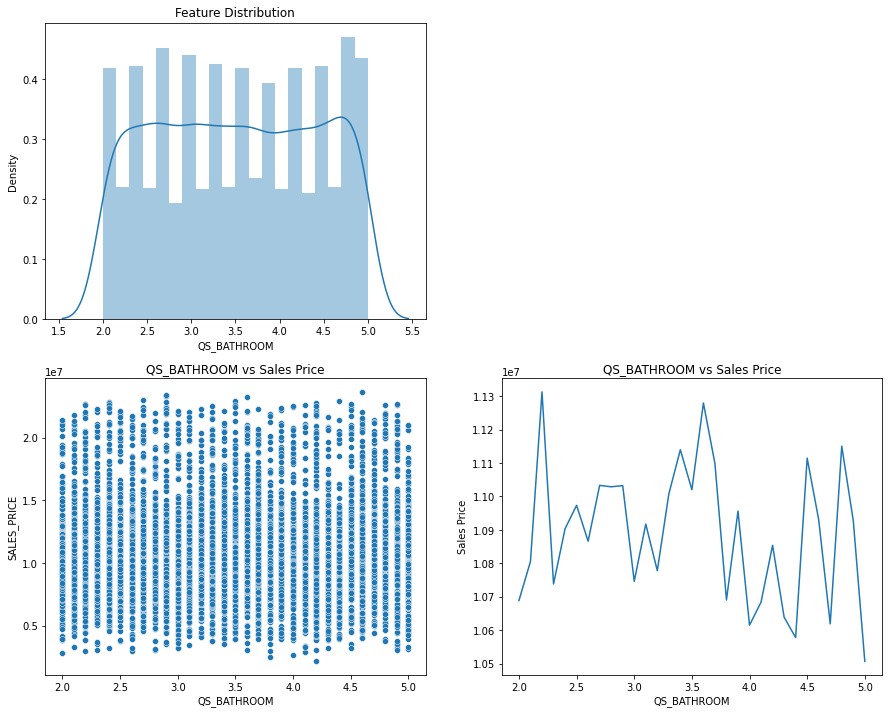

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


In [109]:
plt.figure( figsize=(15,12))
plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.title('Feature Distribution')
sns.distplot(df_new['QS_BATHROOM'], bins=20)

plt.subplot(2, 2, 3)
plt.title('QS_BATHROOM vs Sales Price')
sns.scatterplot( x= df_new['QS_BATHROOM'], y=df_new['SALES_PRICE'])
plt.subplot(2, 2, 4)
df_new.groupby('QS_BATHROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BATHROOM')
plt.ylabel('Sales Price')
plt.title('QS_BATHROOM vs Sales Price')
plt.show()

df_new[['QS_BATHROOM', 'SALES_PRICE']].corr()

1. From the 1st graph, we can see a Uniform distribution of QS_BATHROOM.

2. From the 2nd Graph we can see that there is NO Relation b/w QS_BATHROOM and SALES_PRICE, i.e. IRRESPECTIVE OF THE INCREASE SIZE OF THE BATHROOM, the Selling price of the house KEEPS FLUCTUATUNG & DOES NOT INCREASE OR DECREASE CONSISTENTLY.

3. There is also a NO Correlation between QS_BATHROOM and SALES_PRICE, that means there is a NO Linear Relation between QS_BATHROOM and SALES_PRICE.

4. WE can even DROP QS_BATHROOM FEATURE for the ML MODEL

In [110]:
df_new = df_new.drop(['QS_BATHROOM'], axis= 1)
df_new

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,1,1,3,3,2,15-05-1967,4,2,1,4.9,4.330,7600000,1,0,0
1,6,1986,19-12-2006,2,1,5,3,1,22-12-1995,4,3,4,2.5,3.765,21717770,1,0,0
2,2,909,04-02-2012,1,1,3,3,2,09-02-1992,1,3,5,2.2,3.090,13159200,1,0,0
3,4,1855,13-03-2010,3,2,5,4,1,18-03-1988,3,2,3,3.6,4.010,9630290,0,0,1
4,1,1226,05-10-2009,1,1,3,3,2,13-10-1979,4,3,2,4.1,3.290,7406250,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,03-01-2011,1,1,2,5,1,15-01-1962,1,1,6,2.4,2.520,5353000,0,0,1
7105,4,1897,08-04-2004,3,2,5,4,2,11-04-1995,2,1,4,3.3,3.920,10818480,0,0,1
7106,4,1614,25-08-2006,2,1,4,2,1,01-09-1978,2,3,3,2.9,3.840,8351410,0,1,0
7107,1,787,03-08-2009,1,1,2,1,2,11-08-1977,1,2,5,4.1,4.160,8507000,1,0,0


####QS_BEDROOM

In [111]:
df_new['QS_BEDROOM']

0       4.9
1       2.5
2       2.2
3       3.6
4       4.1
       ... 
7104    2.4
7105    3.3
7106    2.9
7107    4.1
7108    4.3
Name: QS_BEDROOM, Length: 7109, dtype: float64

In [112]:
df_new['QS_BEDROOM'].isnull().sum()

0

1. QS_BEDROOM is a CONTINUOUS FEATURE
2. It does not have ANY NULL VALUES.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


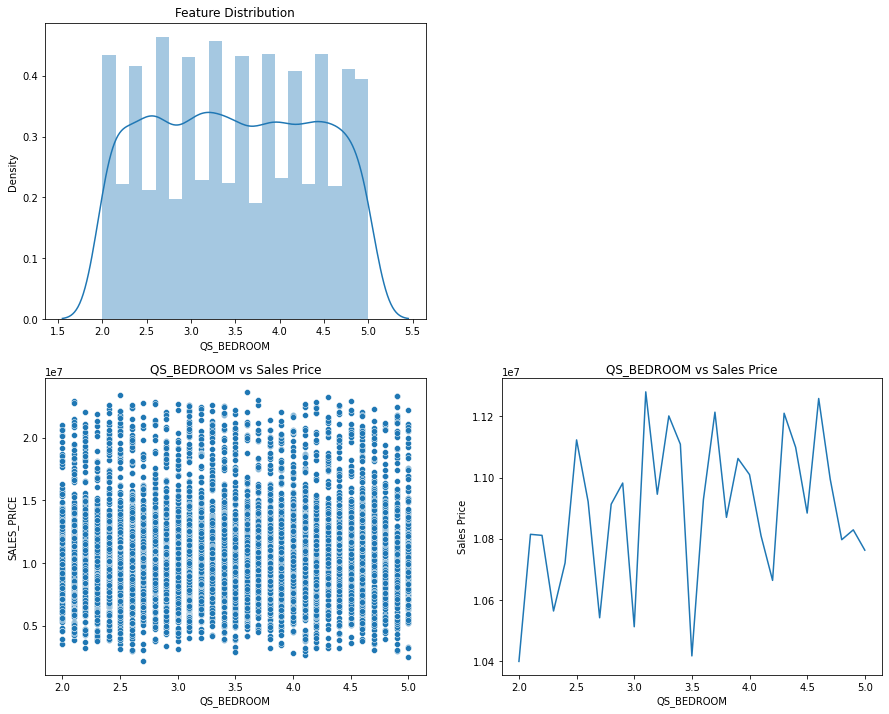

,QS_BEDROOM,SALES_PRICE
QS_BEDROOM,1.000000,0.018804
SALES_PRICE,0.018804,1.000000


In [113]:
plt.figure( figsize=(15,12))
plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.title('Feature Distribution')
sns.distplot(df_new['QS_BEDROOM'], bins=20)

plt.subplot(2, 2, 3)
plt.title('QS_BEDROOM vs Sales Price')
sns.scatterplot( x= df_new['QS_BEDROOM'], y=df_new['SALES_PRICE'])

plt.subplot(2, 2, 4)
df_new.groupby('QS_BEDROOM')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_BEDROOM')
plt.ylabel('Sales Price')
plt.title('QS_BEDROOM vs Sales Price')
plt.show()

df_new[['QS_BEDROOM', 'SALES_PRICE']].corr()

1. From the 1st graph, we can see a Uniform distribution of QS_BEDROOM.

2. From the 2nd Graph we can see that there is NO Relation b/w QS_BEDROOM and SALES_PRICE, i.e. IRRESPECTIVE OF THE INCREASE SIZE OF THE BEDROOM, the Selling price of the house KEEPS FLUCTUATUNG & DOES NOT INCREASE OR DECREASE CONSISTENTLY.

3. There is also a NO Correlation between QS_BEDROOM and SALES_PRICE, that means there is a NO Linear Relation between QS_BEDROOM and SALES_PRICE.

4. WE can even DROP QS_BEDROOM FEATURE for the ML MODEL

In [114]:
df_new = df_new.drop(['QS_BEDROOM'], axis= 1)
df_new

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,1,1,3,3,2,15-05-1967,4,2,1,4.330,7600000,1,0,0
1,6,1986,19-12-2006,2,1,5,3,1,22-12-1995,4,3,4,3.765,21717770,1,0,0
2,2,909,04-02-2012,1,1,3,3,2,09-02-1992,1,3,5,3.090,13159200,1,0,0
3,4,1855,13-03-2010,3,2,5,4,1,18-03-1988,3,2,3,4.010,9630290,0,0,1
4,1,1226,05-10-2009,1,1,3,3,2,13-10-1979,4,3,2,3.290,7406250,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,03-01-2011,1,1,2,5,1,15-01-1962,1,1,6,2.520,5353000,0,0,1
7105,4,1897,08-04-2004,3,2,5,4,2,11-04-1995,2,1,4,3.920,10818480,0,0,1
7106,4,1614,25-08-2006,2,1,4,2,1,01-09-1978,2,3,3,3.840,8351410,0,1,0
7107,1,787,03-08-2009,1,1,2,1,2,11-08-1977,1,2,5,4.160,8507000,1,0,0


####QS_OVERALL

In [115]:
df_new['QS_OVERALL']

0       4.330
1       3.765
2       3.090
3       4.010
4       3.290
        ...  
7104    2.520
7105    3.920
7106    3.840
7107    4.160
7108    3.640
Name: QS_OVERALL, Length: 7109, dtype: float64

In [116]:
df_new['QS_OVERALL'].isnull().sum()

48

1. QS_OVERALL is a CONTINUOUS FEATURE
2. It does not have 48 NULL VALUES. THEY NEED TO HANDLED.

In [117]:
df_new[df_new['QS_OVERALL'].isnull()].sort_values(by=['N_ROOM', 'N_BEDROOM'])

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
186,2,738,02-09-2007,1,1,2,1,1,06-09-1989,3,1,3,NaN,8312670,1,0,0
6111,1,806,30-09-2009,1,1,2,1,2,13-10-1959,4,1,1,NaN,5468500,1,0,0
86,3,1085,19-01-2014,1,1,3,3,2,21-01-2008,3,3,5,NaN,14363500,1,0,0
111,2,1034,30-05-2009,1,1,3,5,2,03-06-1993,1,3,2,NaN,9256740,0,0,1
479,1,984,30-09-2010,1,1,3,4,2,03-10-1997,3,1,2,NaN,5340750,0,1,0
769,3,944,02-05-2012,1,1,3,4,1,05-05-2002,3,2,5,NaN,11663500,1,0,0
955,3,976,21-09-2011,1,1,3,4,2,26-09-1989,2,2,4,NaN,11943700,1,0,0
1447,3,1171,19-02-2010,1,1,3,5,1,21-02-2003,4,1,6,NaN,14035050,1,0,0
2227,3,1196,24-12-2007,1,1,3,3,1,25-12-2002,4,3,6,NaN,11135270,0,0,1
5104,3,1022,28-10-2007,1,1,3,5,2,01-11-1990,3,1,6,NaN,13540150,1,0,0


In [118]:
#df_new[(df_new['N_BATHROOM']==1.0) & (df_new['N_ROOM']==4)]['N_BEDROOM'].mode()
mn_value= df_new['QS_OVERALL'].mean()


Replacing the NAN in QS_OVERALL with MEAN of QS_OVERAL

In [119]:
df_new['QS_OVERALL'].fillna(mn_value, inplace=True)
df_new

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,QS_OVERALL,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,1,1,3,3,2,15-05-1967,4,2,1,4.330,7600000,1,0,0
1,6,1986,19-12-2006,2,1,5,3,1,22-12-1995,4,3,4,3.765,21717770,1,0,0
2,2,909,04-02-2012,1,1,3,3,2,09-02-1992,1,3,5,3.090,13159200,1,0,0
3,4,1855,13-03-2010,3,2,5,4,1,18-03-1988,3,2,3,4.010,9630290,0,0,1
4,1,1226,05-10-2009,1,1,3,3,2,13-10-1979,4,3,2,3.290,7406250,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,03-01-2011,1,1,2,5,1,15-01-1962,1,1,6,2.520,5353000,0,0,1
7105,4,1897,08-04-2004,3,2,5,4,2,11-04-1995,2,1,4,3.920,10818480,0,0,1
7106,4,1614,25-08-2006,2,1,4,2,1,01-09-1978,2,3,3,3.840,8351410,0,1,0
7107,1,787,03-08-2009,1,1,2,1,2,11-08-1977,1,2,5,4.160,8507000,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


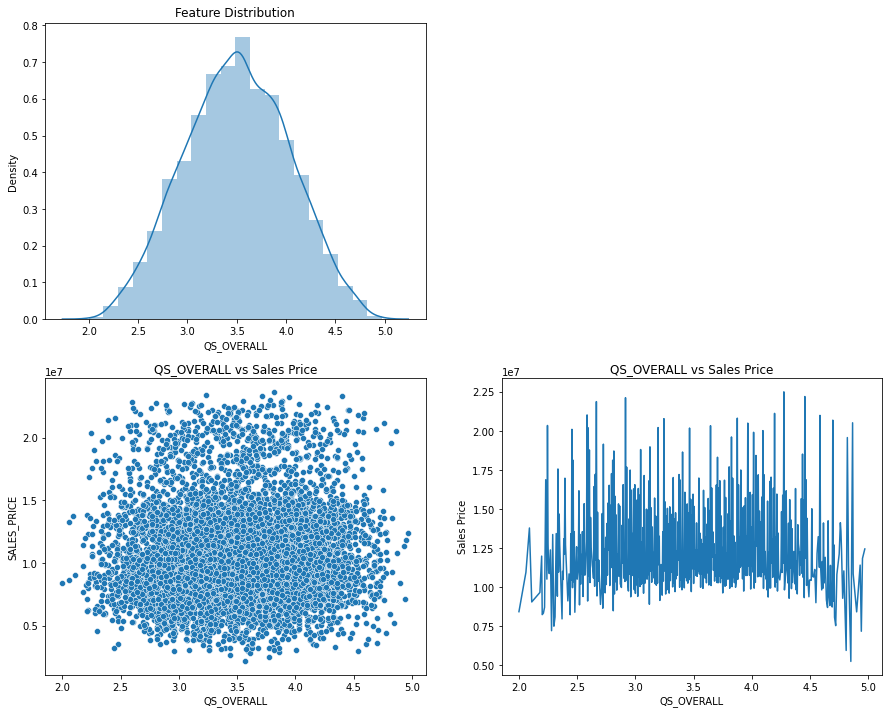

,QS_OVERALL,SALES_PRICE
QS_OVERALL,1.000000,0.020485
SALES_PRICE,0.020485,1.000000


In [120]:
plt.figure( figsize=(15,12))
plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.title('Feature Distribution')
sns.distplot(df_new['QS_OVERALL'], bins=20)

plt.subplot(2, 2, 3)
plt.title('QS_OVERALL vs Sales Price')
sns.scatterplot( x= df_new['QS_OVERALL'], y=df_new['SALES_PRICE'])

plt.subplot(2, 2, 4)
df_new.groupby('QS_OVERALL')['SALES_PRICE'].mean().plot()
plt.xlabel('QS_OVERALL')
plt.ylabel('Sales Price')
plt.title('QS_OVERALL vs Sales Price')
plt.show()

df_new[['QS_OVERALL', 'SALES_PRICE']].corr()

1. From the 1st graph, we can see a Normal distribution of QS_OVERALL.

2. From the 2nd Graph we can see that there is NO Relation b/w QS_OVERALL and SALES_PRICE, i.e. IRRESPECTIVE OF THE INCREASE SIZES, the Selling price of the house KEEPS FLUCTUATUNG & DOES NOT INCREASE OR DECREASE CONSISTENTLY.

3. There is also a NO Correlation between QS_OVERALL and SALES_PRICE, that means there is a NO Linear Relation between QS_OVERALL and SALES_PRICE.

4. WE can even DROP QS_OVERALL FEATURE for the ML MODEL

In [121]:
df_new = df_new.drop(['QS_OVERALL'], axis= 1)
df_new

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,04-05-2011,1,1,3,3,2,15-05-1967,4,2,1,7600000,1,0,0
1,6,1986,19-12-2006,2,1,5,3,1,22-12-1995,4,3,4,21717770,1,0,0
2,2,909,04-02-2012,1,1,3,3,2,09-02-1992,1,3,5,13159200,1,0,0
3,4,1855,13-03-2010,3,2,5,4,1,18-03-1988,3,2,3,9630290,0,0,1
4,1,1226,05-10-2009,1,1,3,3,2,13-10-1979,4,3,2,7406250,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,03-01-2011,1,1,2,5,1,15-01-1962,1,1,6,5353000,0,0,1
7105,4,1897,08-04-2004,3,2,5,4,2,11-04-1995,2,1,4,10818480,0,0,1
7106,4,1614,25-08-2006,2,1,4,2,1,01-09-1978,2,3,3,8351410,0,1,0
7107,1,787,03-08-2009,1,1,2,1,2,11-08-1977,1,2,5,8507000,1,0,0


###CHECKING TEMPORAL (DATETIME) FEATURES

In [122]:
df_new[['DATE_SALE','DATE_BUILD']].dtypes

DATE_SALE     object
DATE_BUILD    object
dtype: object

Both DATE_SALE & DATE_BUILD are of Object Types and needs to be converted to DateTime Format

In [123]:
df_new['DATE_SALE'] = pd.to_datetime(df_new['DATE_SALE'])#, format = '%d-%m-%Y')
df_new['DATE_BUILD'] = pd.to_datetime(df_new['DATE_BUILD'])#, format = '%d-%m-%Y')

In [124]:
df_new[['DATE_SALE','DATE_BUILD']].dtypes

DATE_SALE     datetime64[ns]
DATE_BUILD    datetime64[ns]
dtype: object

Using the DATE_BUILD & DATE_SALE features' values, we can claculate the AGE_OF_THE_BUILDING. This AGE_OF_THE_BUILDING can become a new feature for our ML Model and can replace the DATE_SALE and DATE_BUILD features.

In [125]:
#yr_dt_bld = pd.DatetimeIndex(df_new['DATE_BUILD']).year
#yr_dt_sld = pd.DatetimeIndex(df_new['DATE_SALE']).year
#age_of_build = yr_dt_sld - yr_dt_bld
#age_of_build

#df_new['YR_OF_BUILD']= pd.DatetimeIndex(df_new['DATE_BUILD']).year
#df_new['YR_OF_SALE']= pd.DatetimeIndex(df_new['DATE_SALE']).year
#df_new['AGE_OF_THE_BUILDING']= df_date['YR_OF_SALE'] - df_date['YR_OF_BUILD']

df_new['AGE_OF_THE_BUILDING']= pd.DatetimeIndex(df_new['DATE_SALE']).year - pd.DatetimeIndex(df_new['DATE_BUILD']).year
df_new




,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,AGE_OF_THE_BUILDING
0,1,1004,2011-04-05,1,1,3,3,2,1967-05-15,4,2,1,7600000,1,0,0,44
1,6,1986,2006-12-19,2,1,5,3,1,1995-12-22,4,3,4,21717770,1,0,0,11
2,2,909,2012-04-02,1,1,3,3,2,1992-09-02,1,3,5,13159200,1,0,0,20
3,4,1855,2010-03-13,3,2,5,4,1,1988-03-18,3,2,3,9630290,0,0,1,22
4,1,1226,2009-05-10,1,1,3,3,2,1979-10-13,4,3,2,7406250,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,5,1,1962-01-15,1,1,6,5353000,0,0,1,49
7105,4,1897,2004-08-04,3,2,5,4,2,1995-11-04,2,1,4,10818480,0,0,1,9
7106,4,1614,2006-08-25,2,1,4,2,1,1978-01-09,2,3,3,8351410,0,1,0,28
7107,1,787,2009-03-08,1,1,2,1,2,1977-11-08,1,2,5,8507000,1,0,0,32


Dropping DATE_BUILD & DATE_SALE features

In [126]:
df_new.drop(['DATE_SALE', 'DATE_BUILD'], axis= 1, inplace= True)
df_new

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,AGE_OF_THE_BUILDING
0,1,1004,1,1,3,3,2,4,2,1,7600000,1,0,0,44
1,6,1986,2,1,5,3,1,4,3,4,21717770,1,0,0,11
2,2,909,1,1,3,3,2,1,3,5,13159200,1,0,0,20
3,4,1855,3,2,5,4,1,3,2,3,9630290,0,0,1,22
4,1,1226,1,1,3,3,2,4,3,2,7406250,0,0,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,1,1,1,6,5353000,0,0,1,49
7105,4,1897,3,2,5,4,2,2,1,4,10818480,0,0,1,9
7106,4,1614,2,1,4,2,1,2,3,3,8351410,0,1,0,28
7107,1,787,1,1,2,1,2,1,2,5,8507000,1,0,0,32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


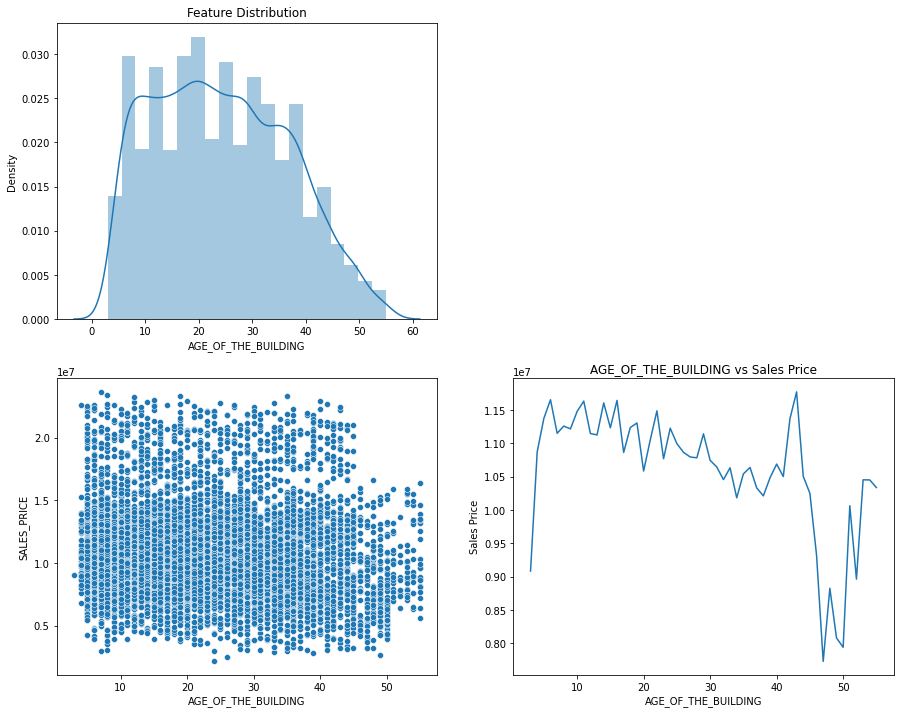

,AGE_OF_THE_BUILDING,SALES_PRICE
AGE_OF_THE_BUILDING,1.000000,-0.118842
SALES_PRICE,-0.118842,1.000000


In [127]:
plt.figure( figsize=(15,12))
plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.title('Feature Distribution')
sns.distplot(df_new['AGE_OF_THE_BUILDING'], bins=20)

plt.subplot(2, 2, 3)
sns.scatterplot( x= df_new['AGE_OF_THE_BUILDING'], y=df_new['SALES_PRICE'])
plt.subplot(2, 2, 4)
df_new.groupby('AGE_OF_THE_BUILDING')['SALES_PRICE'].mean().plot()
plt.xlabel('AGE_OF_THE_BUILDING')
plt.ylabel('Sales Price')
plt.title('AGE_OF_THE_BUILDING vs Sales Price')
plt.show()

df_new[['AGE_OF_THE_BUILDING', 'SALES_PRICE']].corr()

1. From the 1st graph, we can see that it is slightly positively skewed and that AGE_OF_THE_BUILDING are mostly between 5 years to 45 years, and some buildings with age even beyond that.

2. From the 2nd Graph we can see that there is a Relation b/w AGE_OF_THE_BUILDING and SALES_PRICE although not very prominent, i.e. as the Building becomes older, the Selling price of the house also decreases especially once the buildings cross 30 years.

###IQR BOX PLOT FOR OUTLIER DETECTION

Final Features in Chennai House Price Predictions are:
AREA
INT_SQFT
N_BEDROOM
N_BATHROOM
N_ROOM
SALE_COND
PARK_FACIL
UTILITY_AVAIL
STREET
MZZONE
SALES_PRICE
BUILDTYPE_Commercial
BUILDTYPE_House
BUILDTYPE_Others
AGE_OF_THE_BUILDING


<Figure size 1080x864 with 0 Axes>

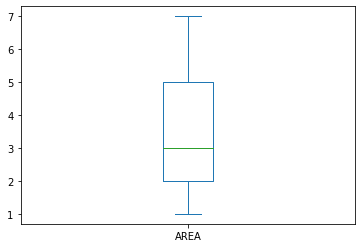

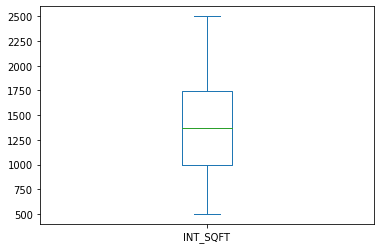

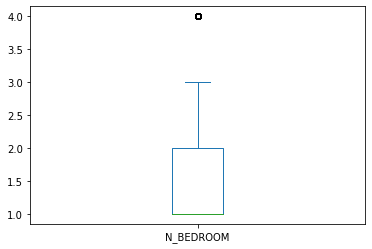

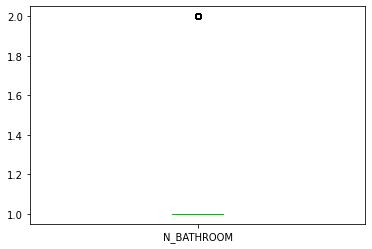

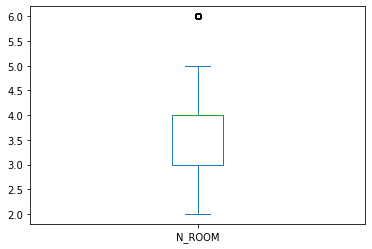

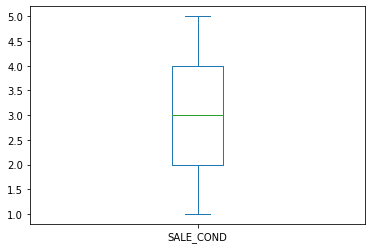

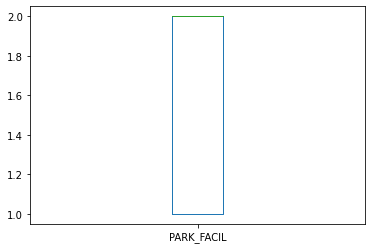

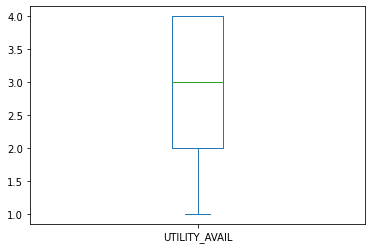

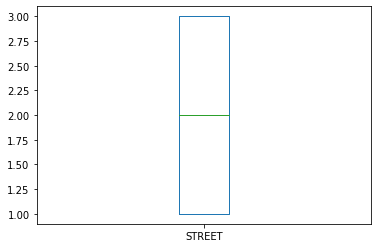

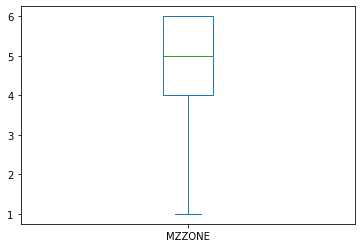

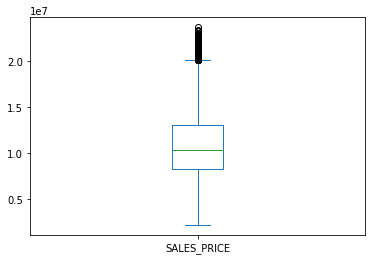

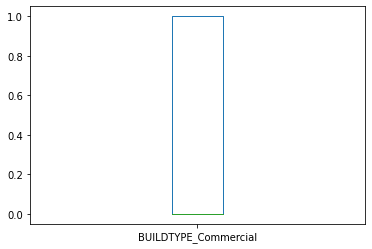

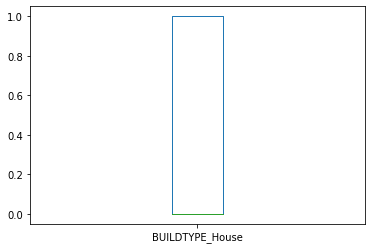

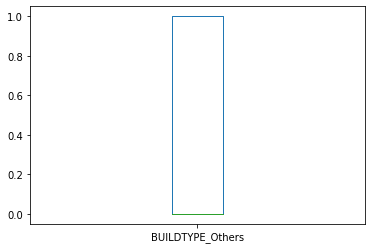

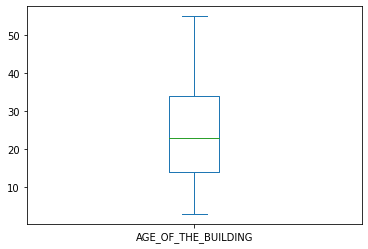

In [128]:
plt.figure( figsize=(15,12))
print("Final Features in Chennai House Price Predictions are:")
for f in df_new.columns:
  print(f)
  df_new.plot(y= str(f), kind='box')

No Outliers in the iput features, this is good for the model building

###MODEL FITTING

DATA SPLITTING INTO TEST AND TRAIN DATA

In [129]:
in_features=['AREA',	'INT_SQFT',	'N_BEDROOM',	'N_BATHROOM',	'N_ROOM',	'SALE_COND',	'PARK_FACIL',	'UTILITY_AVAIL',	'STREET',	'MZZONE',	'BUILDTYPE_Commercial',	'BUILDTYPE_House',	'BUILDTYPE_Others',	'AGE_OF_THE_BUILDING']

X = df_new[in_features].values
Y = df_new['SALES_PRICE'].values
X
#Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
#X_train
#Y_train

NORMALISING THE DATA

In [130]:
scaler = MinMaxScaler() #initialis

#scaler = StandardScaler() #initialis
scaler.fit(X_train, Y_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #only transform the test dataset, dont fit it

####LINEAR REGRESSION

In [131]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_LR_pred= regressor.predict(X_test_scaled)

In [132]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_LR_pred})
df1

,Actual,Predicted
0,17879080,16711680.0
1,7865000,6963200.0
2,13679850,13025280.0
3,10064150,9428992.0
4,10757980,11157504.0
...,...,...
2128,12085470,12533760.0
2129,6916250,7102464.0
2130,10934875,10477568.0
2131,17523920,17227776.0


In [133]:
print("R2 Score FOR LINEAR REGRESSION:", metrics.r2_score(Y_test, Y_LR_pred))

R2 Score FOR LINEAR REGRESSION: 0.9237459329301404


####K-NEAREST NEIGHBOUR

In [134]:
max_score= 0
best_k= 0
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,Y_train) # training the model
  score= np.mean(cross_val_score(knn, X_train, Y_train, cv=10))
  print("K value  : " , i, " score : ", score) #predicting using the model
  if score > max_score:
    max_score = score
    best_k= i


K value  :  1  score :  0.899257940032282
K value  :  2  score :  0.9217708611373882
K value  :  3  score :  0.9266244202042717
K value  :  4  score :  0.9270430907443112
K value  :  5  score :  0.9255227162194283
K value  :  6  score :  0.9243870071919209
K value  :  7  score :  0.9228174904031483
K value  :  8  score :  0.9213374787478852
K value  :  9  score :  0.9192203574598337
K value  :  10  score :  0.9178727691336371
K value  :  20  score :  0.9047891150337461
K value  :  50  score :  0.8761566168608773


In [135]:
print("BEST CROSS-VAL SCORE WAS FOR K= ", best_k)

knnregressor = knn = KNeighborsRegressor(best_k) #initialising the model
knnregressor.fit(X_train,Y_train)
Y_KNN_pred= knnregressor.predict(X_test_scaled)

BEST CROSS-VAL SCORE WAS FOR K=  4


In [136]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_KNN_pred})
df1

,Actual,Predicted
0,17879080,19192325.0
1,7865000,8063962.5
2,13679850,12768017.5
3,10064150,10156500.0
4,10757980,11631192.5
...,...,...
2128,12085470,12490997.5
2129,6916250,7980695.0
2130,10934875,10327262.5
2131,17523920,17692297.5


In [137]:
print("R2 Score FOR K-NEAREST NEIGHBOUR:", metrics.r2_score(Y_test, Y_KNN_pred))

R2 Score FOR K-NEAREST NEIGHBOUR: 0.9295627321231341


####DECISION TREE

In [138]:
dtregressor = DecisionTreeRegressor()

dtregressor.fit(X_train, Y_train)
Y_DT_pred = dtregressor.predict(X_test_scaled)

In [139]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_DT_pred})
df1

,Actual,Predicted
0,17879080,18758320.0
1,7865000,8732470.0
2,13679850,13922760.0
3,10064150,10236350.0
4,10757980,11956550.0
...,...,...
2128,12085470,12548930.0
2129,6916250,6450250.0
2130,10934875,10918760.0
2131,17523920,15982580.0


In [140]:
print("R2 Score:", metrics.r2_score(Y_test, Y_DT_pred))

R2 Score: 0.9709119909885249


####RANDOM FOREST

In [141]:
rfregressor = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='sqrt')
rfregressor.fit(X_train,Y_train)

Y_RF_pred= rfregressor.predict(X_test_scaled)

In [142]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_RF_pred})
df1

,Actual,Predicted
0,17879080,1.530477e+07
1,7865000,8.206855e+06
2,13679850,1.326532e+07
3,10064150,9.588569e+06
4,10757980,1.103919e+07
...,...,...
2128,12085470,1.287387e+07
2129,6916250,9.093055e+06
2130,10934875,9.984026e+06
2131,17523920,1.535693e+07


In [143]:
print("R2 Score:", metrics.r2_score(Y_test, Y_RF_pred))

R2 Score: 0.7634105860218783


####XG BOOST

In [144]:
best_lr= 0
best_score= 0
for lr in [0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,1]:
  xgbregressor = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xgbregressor.fit(X_train,Y_train) #train the model
  
  train_score = xgbregressor.score(X_train, Y_train)
  crossval_score = np.mean(cross_val_score(xgbregressor, X_train, Y_train, cv=10))
  if crossval_score > best_score:
    best_score = crossval_score
    best_lr = lr
  print("Learning rate : ", lr, " Train score : ", train_score, " Cross-Val score : ", crossval_score)


Learning rate :  0.05  Train score :  0.9752383576955826  Cross-Val score :  0.9729584552145469
Learning rate :  0.06  Train score :  0.9804862967255016  Cross-Val score :  0.978978665701973
Learning rate :  0.07  Train score :  0.9851583287192217  Cross-Val score :  0.9831891564524785
Learning rate :  0.08  Train score :  0.9885906900896281  Cross-Val score :  0.9861227758658935
Learning rate :  0.09  Train score :  0.9906690237281914  Cross-Val score :  0.9886088258276035
Learning rate :  0.1  Train score :  0.9917330905810161  Cross-Val score :  0.9903938624496472
Learning rate :  0.15  Train score :  0.9956604189838343  Cross-Val score :  0.994105925725826
Learning rate :  0.2  Train score :  0.9964873254086125  Cross-Val score :  0.995511779061116
Learning rate :  0.25  Train score :  0.9965000802677128  Cross-Val score :  0.9955877419296104
Learning rate :  0.3  Train score :  0.9968036543001365  Cross-Val score :  0.9955089577352512
Learning rate :  0.35  Train score :  0.996968

In [145]:
print("The Best Learning Rate for this model is : ",best_lr)

xgbregressor = xgb.XGBRegressor(learning_rate = best_lr, n_estimators=100)
xgbregressor.fit(X_train,Y_train) #train the model


The Best Learning Rate for this model is :  0.7
[10:46:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.7)

In [146]:
Y_XGB_pred = xgbregressor.predict(X_test_scaled)

In [147]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_XGB_pred})
df1

,Actual,Predicted
0,17879080,17852772.0
1,7865000,7803237.0
2,13679850,13658774.0
3,10064150,9996892.0
4,10757980,10746642.0
...,...,...
2128,12085470,12082390.0
2129,6916250,7216579.0
2130,10934875,11226296.0
2131,17523920,17634726.0


In [148]:
print("R2 Score FOR XG BOOST: ",metrics.r2_score(Y_test, Y_XGB_pred))

R2 Score FOR XG BOOST:  0.997497970415187


####R2 SCORES

In [149]:
print("R2 Score FOR LINEAR REGRESSION:", metrics.r2_score(Y_test, Y_LR_pred))

R2 Score FOR LINEAR REGRESSION: 0.9237459329301404


In [150]:
print("R2 Score FOR K-NEAREST NEIGHBOUR:", metrics.r2_score(Y_test, Y_KNN_pred))

R2 Score FOR K-NEAREST NEIGHBOUR: 0.9295627321231341


In [151]:
print("R2 Score FOR DECISION TREE:", metrics.r2_score(Y_test, Y_DT_pred))

R2 Score FOR DECISION TREE: 0.9709119909885249


In [152]:
print("R2 Score FOR RANDOM FOREST:", metrics.r2_score(Y_test, Y_RF_pred))

R2 Score FOR RANDOM FOREST: 0.7634105860218783


In [153]:
print("R2 Score FOR XG BOOST: ",metrics.r2_score(Y_test, Y_XGB_pred)) # scoring the model - r2 squared

R2 Score FOR XG BOOST:  0.997497970415187


The Best R2 Score was achieved using XG Boost. Hence we can use XG BOOST Model to Predict our Sales Prices.

####FEATURE IMPORTANCE

In [154]:
rank=1
for i in sorted(zip(regressor.coef_,in_features), reverse=True):
  print('Rank:',rank,"\t\tImportance:",round(i[0],2),"\t\tFeature:",i[1])
  rank+=1

Rank: 1 		Importance: 6.86745609296134e+19 		Feature: BUILDTYPE_Commercial
Rank: 2 		Importance: 6.8674560929609466e+19 		Feature: BUILDTYPE_Others
Rank: 3 		Importance: 6.86745609296088e+19 		Feature: BUILDTYPE_House
Rank: 4 		Importance: 6958250.91 		Feature: N_ROOM
Rank: 5 		Importance: 3469972.82 		Feature: AREA
Rank: 6 		Importance: 2937857.89 		Feature: MZZONE
Rank: 7 		Importance: 2789914.32 		Feature: INT_SQFT
Rank: 8 		Importance: 1030727.95 		Feature: PARK_FACIL
Rank: 9 		Importance: 966112.7 		Feature: STREET
Rank: 10 		Importance: 532363.22 		Feature: SALE_COND
Rank: 11 		Importance: 206990.91 		Feature: N_BATHROOM
Rank: 12 		Importance: 135720.59 		Feature: UTILITY_AVAIL
Rank: 13 		Importance: -927304.16 		Feature: AGE_OF_THE_BUILDING
Rank: 14 		Importance: -4627714.45 		Feature: N_BEDROOM


In [158]:
rank=1
for i in sorted(zip(rfregressor.feature_importances_,in_features), reverse=True):
  print('Rank:',rank,"\t\tImportance:",round(i[0],2),"\t\tFeature:",i[1])
  rank+=1
  

Rank: 1 		Importance: 0.28 		Feature: AREA
Rank: 2 		Importance: 0.22 		Feature: INT_SQFT
Rank: 3 		Importance: 0.18 		Feature: BUILDTYPE_Commercial
Rank: 4 		Importance: 0.13 		Feature: N_ROOM
Rank: 5 		Importance: 0.08 		Feature: MZZONE
Rank: 6 		Importance: 0.06 		Feature: BUILDTYPE_House
Rank: 7 		Importance: 0.02 		Feature: N_BEDROOM
Rank: 8 		Importance: 0.01 		Feature: BUILDTYPE_Others
Rank: 9 		Importance: 0.01 		Feature: PARK_FACIL
Rank: 10 		Importance: 0.0 		Feature: STREET
Rank: 11 		Importance: 0.0 		Feature: N_BATHROOM
Rank: 12 		Importance: 0.0 		Feature: AGE_OF_THE_BUILDING
Rank: 13 		Importance: 0.0 		Feature: UTILITY_AVAIL
Rank: 14 		Importance: 0.0 		Feature: SALE_COND


In [156]:
rank=1
for i in sorted(zip(dtregressor.feature_importances_,in_features), reverse=True):
  print('Rank:',rank,"\t\tImportance:",round(i[0],2),"\t\tFeature:",i[1])
  rank+=1
  

Rank: 1 		Importance: 0.49 		Feature: AREA
Rank: 2 		Importance: 0.32 		Feature: BUILDTYPE_Commercial
Rank: 3 		Importance: 0.11 		Feature: INT_SQFT
Rank: 4 		Importance: 0.04 		Feature: MZZONE
Rank: 5 		Importance: 0.01 		Feature: PARK_FACIL
Rank: 6 		Importance: 0.01 		Feature: N_BATHROOM
Rank: 7 		Importance: 0.01 		Feature: STREET
Rank: 8 		Importance: 0.01 		Feature: AGE_OF_THE_BUILDING
Rank: 9 		Importance: 0.0 		Feature: BUILDTYPE_Others
Rank: 10 		Importance: 0.0 		Feature: BUILDTYPE_House
Rank: 11 		Importance: 0.0 		Feature: SALE_COND
Rank: 12 		Importance: 0.0 		Feature: UTILITY_AVAIL
Rank: 13 		Importance: 0.0 		Feature: N_ROOM
Rank: 14 		Importance: 0.0 		Feature: N_BEDROOM


In [155]:
rank= 1
for i in sorted( zip( xgbregressor.feature_importances_ , in_features), reverse=True):
  print('Rank:',rank,"\t\tImportance:",round(i[0],2),"\t\tFeature:",i[1])
  rank+=1

Rank: 1 		Importance: 0.45 		Feature: BUILDTYPE_Commercial
Rank: 2 		Importance: 0.34 		Feature: AREA
Rank: 3 		Importance: 0.04 		Feature: PARK_FACIL
Rank: 4 		Importance: 0.03 		Feature: INT_SQFT
Rank: 5 		Importance: 0.03 		Feature: MZZONE
Rank: 6 		Importance: 0.03 		Feature: STREET
Rank: 7 		Importance: 0.02 		Feature: BUILDTYPE_House
Rank: 8 		Importance: 0.02 		Feature: N_BATHROOM
Rank: 9 		Importance: 0.01 		Feature: N_ROOM
Rank: 10 		Importance: 0.01 		Feature: N_BEDROOM
Rank: 11 		Importance: 0.01 		Feature: SALE_COND
Rank: 12 		Importance: 0.0 		Feature: AGE_OF_THE_BUILDING
Rank: 13 		Importance: 0.0 		Feature: UTILITY_AVAIL
Rank: 14 		Importance: 0.0 		Feature: BUILDTYPE_Others


After analysing Feature Importance generated of all the models, we can see that below are the features that are most important to predict the SALES_PRICE:
1. AREA
2. INT_SQFT
3. MZZONE
4. PARK_FACIL
5. N_ROOM
6. BUILDTYPE

####PRICE PREDICTIONS

#####Price Predictions using Standard Deviation

In [157]:
def priceRangeCalculator(predSellPriceSample, actual_price_dataset, predicted_prices_dataset):

  #Getting prediction interval for Linear Regression

  #performing this calculation of Standard Deviation below: SE = sqrt(1 / (N - 2) * e(i)^2 for i to N)
  sum_errs = np.sum( (actual_price_dataset - predicted_prices_dataset) ** 2)
  
  stdev = np.sqrt( 1 / ( len(actual_price_dataset) - 2) * sum_errs)

  #WE WILL CALCULATE THE PREDICTION INTERVALS
  #We will use the significance level of 95%, which is 1.96 standard deviations.
  #REASON:
  #In probability and statistics, the 97.5th percentile point of the standard normal distribution is a 
  #number commonly used for statistical calculations. The approximate value of this number is 1.96


  # calculate prediction interval
  interval = 1.96 * stdev    #interval = significance level of 95% * standard_deviation

  #Calculating Lower Limit and the Upper Limit
  lower_limit = predSellPriceSample - interval
  upper_limit = predSellPriceSample + interval

  print("Predicted Price: Rs.", round(predSellPriceSample, 2))
  print("Negotiable Range of Selling Price:\nStarting Price: Rs.",round(lower_limit, 2), "\tMaximum Price: Rs.",round(upper_limit, 2))

#------------------------------------------------------------------------------------------------------------------#

Y_pred_output_sample= Y_XGB_pred[0]  #THIS IS A SAMPLE OF A PREDICTED SALES_PRICE  
priceRangeCalculator(Y_pred_output_sample, Y_test, Y_XGB_pred)

Predicted Price: Rs. 17852772.0
Negotiable Range of Selling Price:
Starting Price: Rs. 17486064.31 	Maximum Price: Rs. 18219479.69
